In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix,classification_report, multilabel_confusion_matrix
from dataclasses import dataclass
from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import minmax_scale, StandardScaler
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [5]:
# Define column names
md = [' ?','NaN']
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
url = 'https://raw.githubusercontent.com/shreyapande1/Income-Prediction/main/adult.data'
df = pd.read_csv(url,header = None, names = column_names,na_values=md )

In [6]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Pre-Processing

In [7]:
#Count the number of missing values in each column of the DataFrame
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [8]:
# Calculate percentage distribution for each column
for column in df.columns:
    if df[column].dtype == 'O':  # Check if the column has an object (string) data type
        percentage_distribution = df[column].value_counts()
        print(f"Percentage distribution for {column}:\n{percentage_distribution}\n")
    else:
        print(f"{column} is not an object (string) column.\n")

age is not an object (string) column.

Percentage distribution for workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

fnlwgt is not an object (string) column.

Percentage distribution for education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

education_num is not an object (string) column.

Percentage distribution for marital_status:
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separ

In [9]:
# Remove rows with missing values from the DataFrame
df.dropna(inplace= True)

In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Dropping duplicate rows
df.drop_duplicates()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


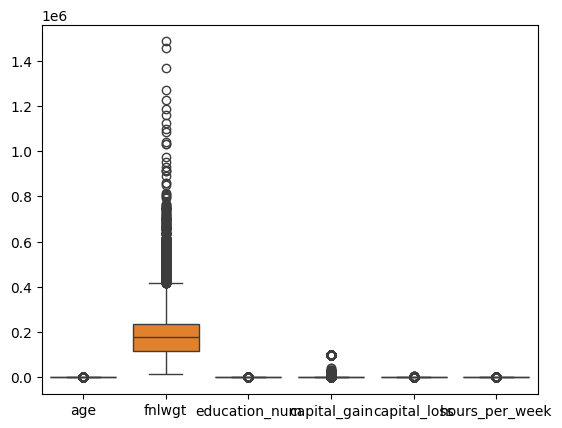

In [13]:
# Creating a boxplot for the columns of the dataframe
sns.boxplot(data=df)
plt.show()

In [14]:
# Replacing the values in a specific coolumn
df['income'].replace(' >50K.', '>50K', inplace=True)
df['income'].replace(' <=50K.', '<=50K', inplace=True)

In [15]:
# Count the number of numeric columns in the DataFrame
num_cols_count = df.select_dtypes(include='number').shape[1]

# Specify the desired number of columns per row for visualization
cols_per_row = 3

# Calculate the number of rows needed for the visualization layout
num_rows = (num_cols_count - 1) // cols_per_row + 1

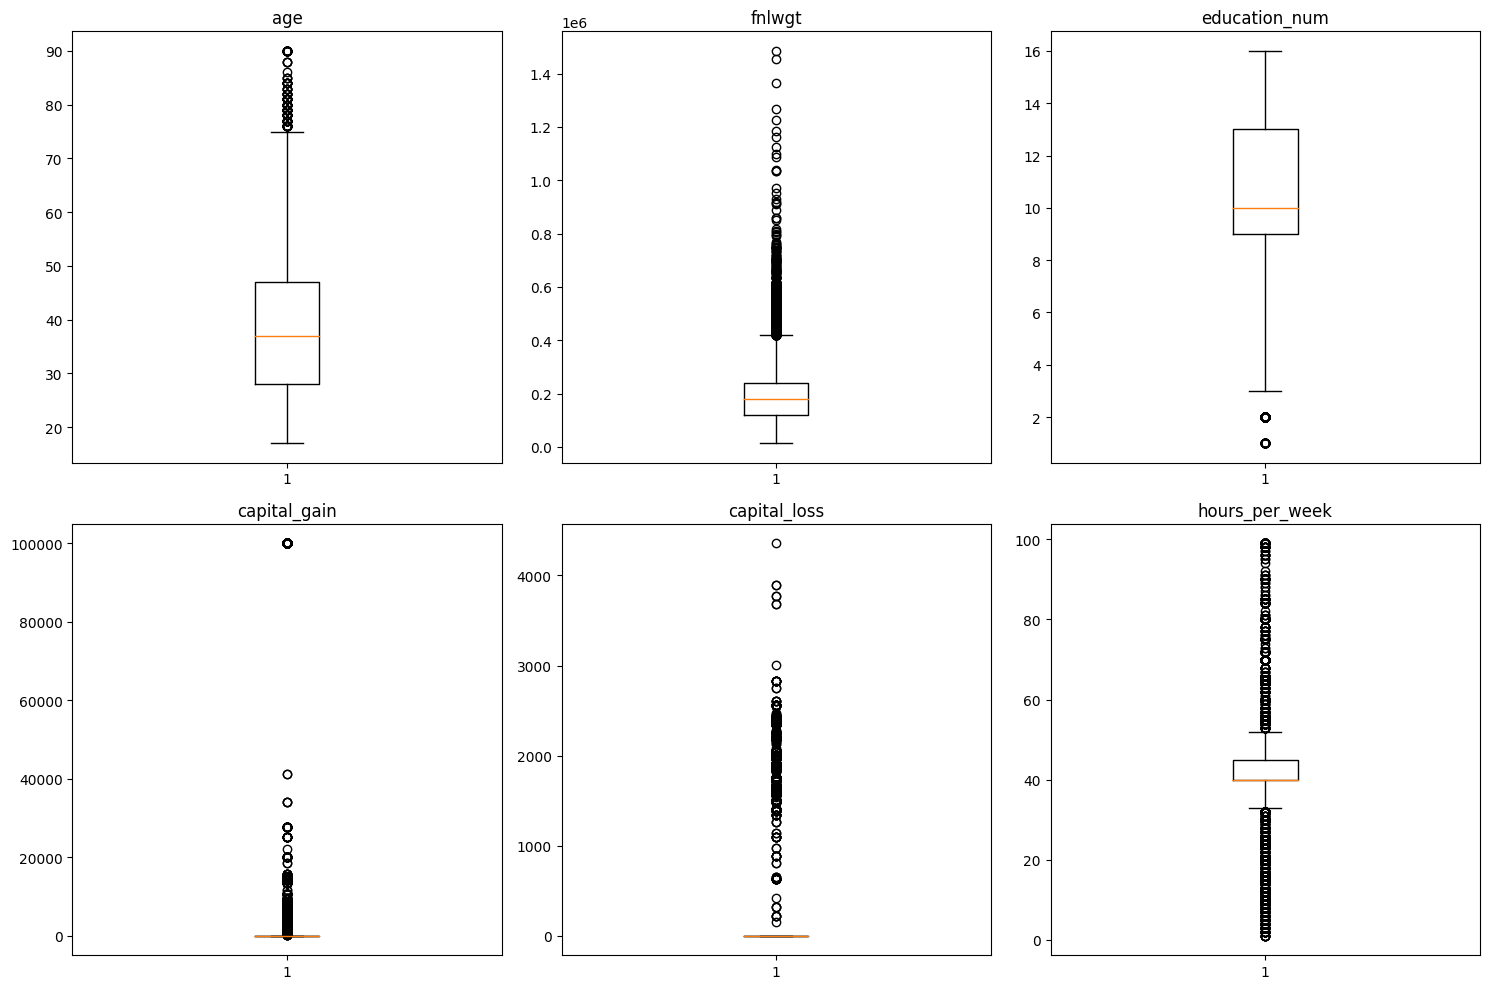

In [16]:

numeric_columns = df.select_dtypes(include='number').columns
num_cols_count = len(numeric_columns)
cols_per_row = 3

# Calculate the number of rows needed
num_rows = (num_cols_count - 1) // cols_per_row + 1
total_subplots = num_rows * cols_per_row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, col in enumerate(numeric_columns):
    if i < total_subplots:
        ax = axes[i]
        ax.boxplot(df[col])
        ax.set_title(col)
    else:
        break

# Turn off extra subplots if there are fewer numeric columns than total_subplots
for j in range(num_cols_count, total_subplots):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


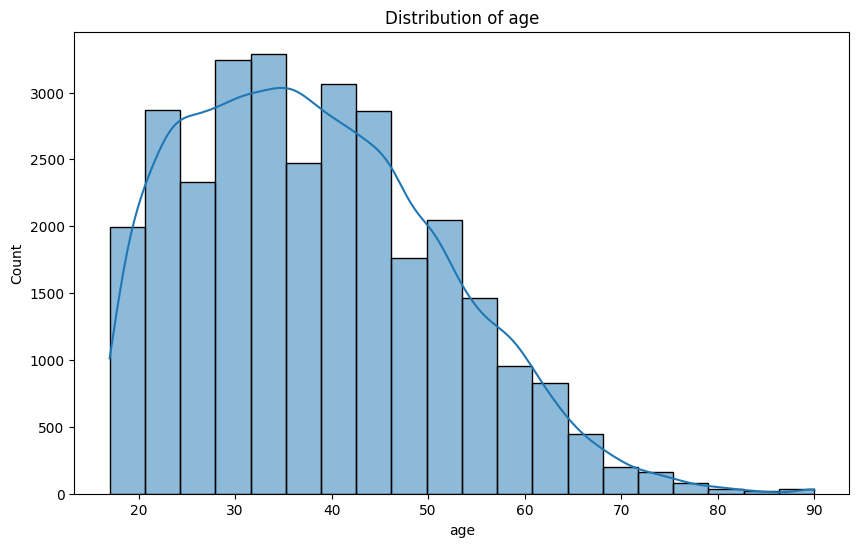

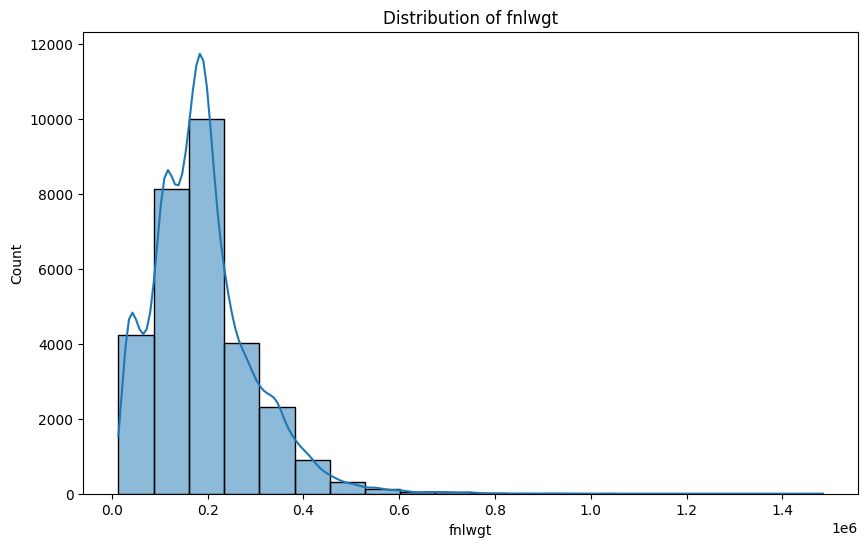

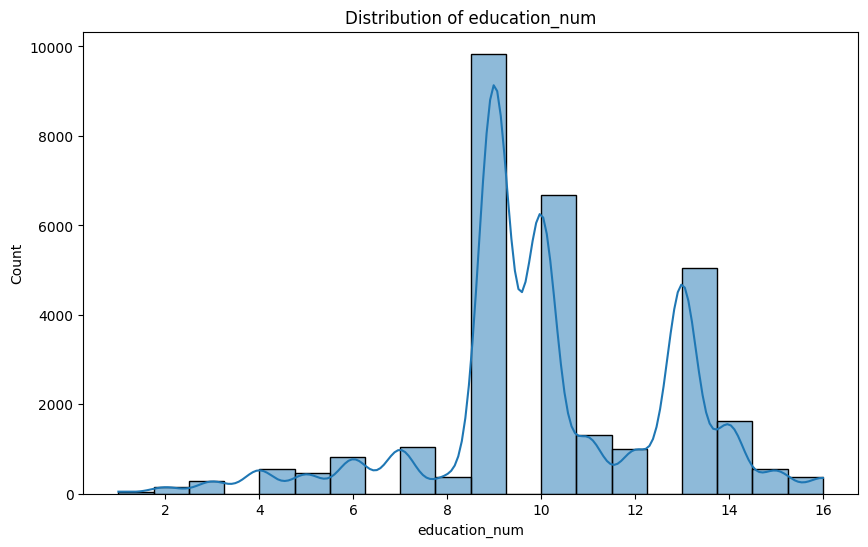

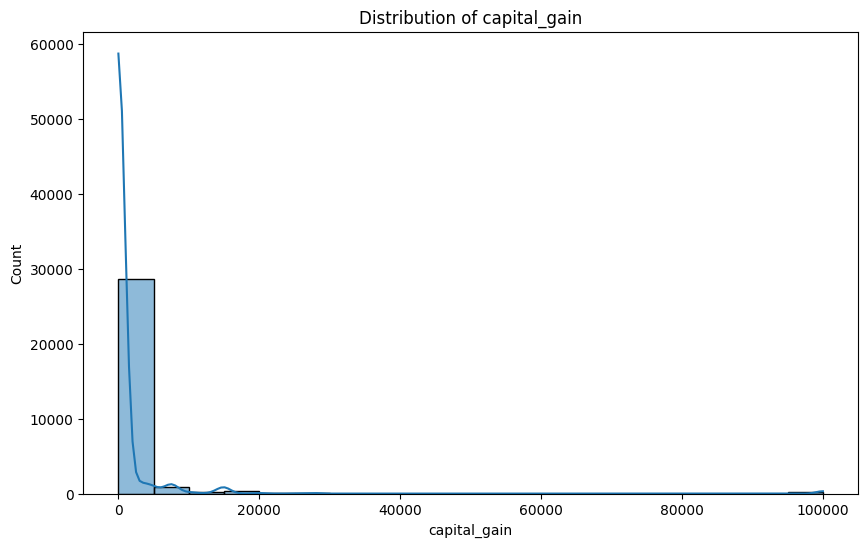

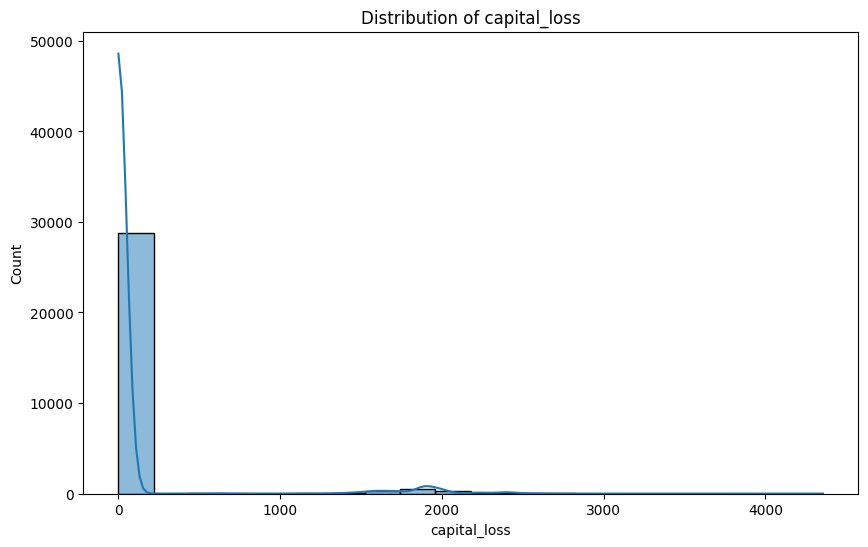

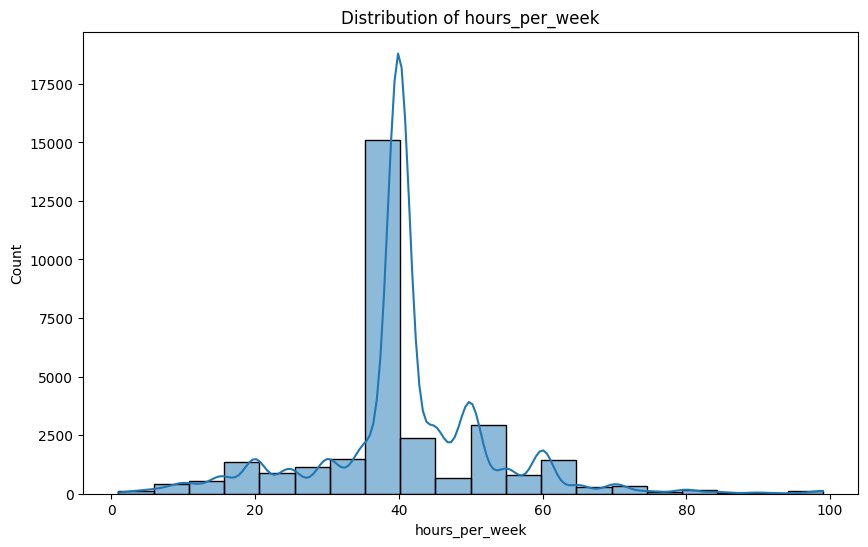

In [17]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create distribution plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

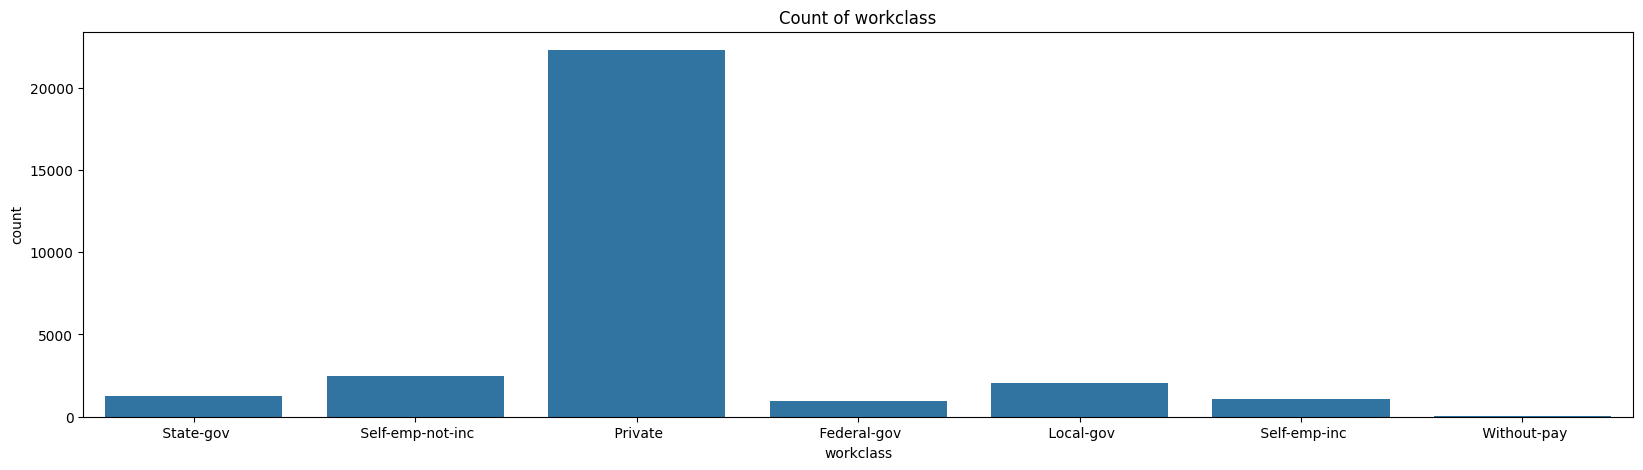

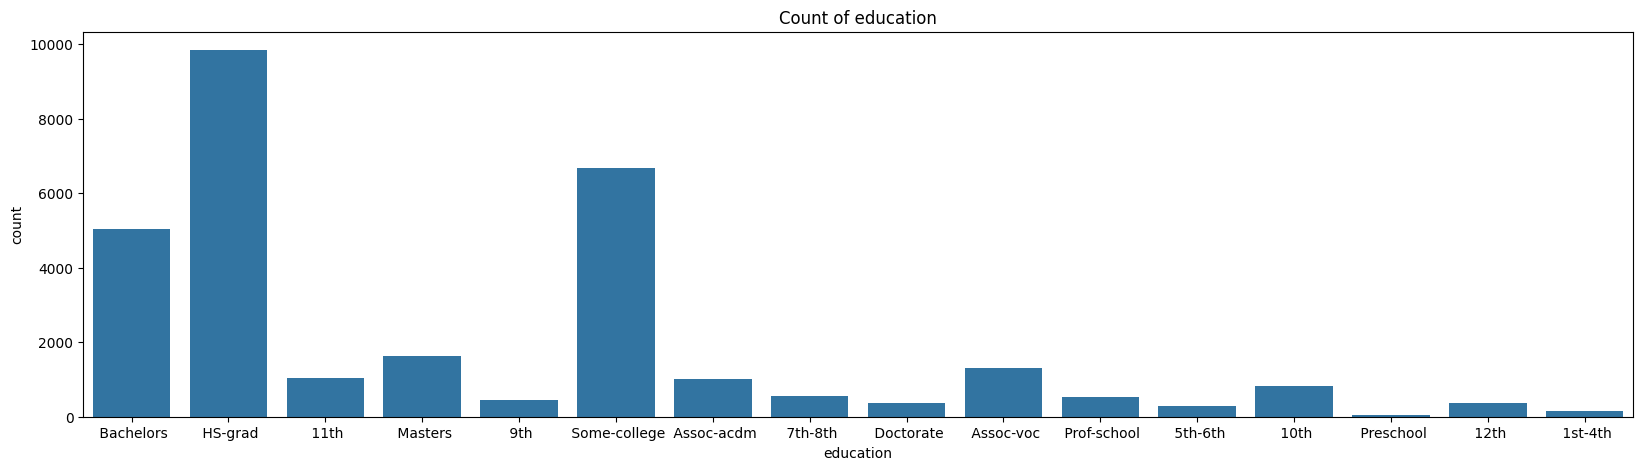

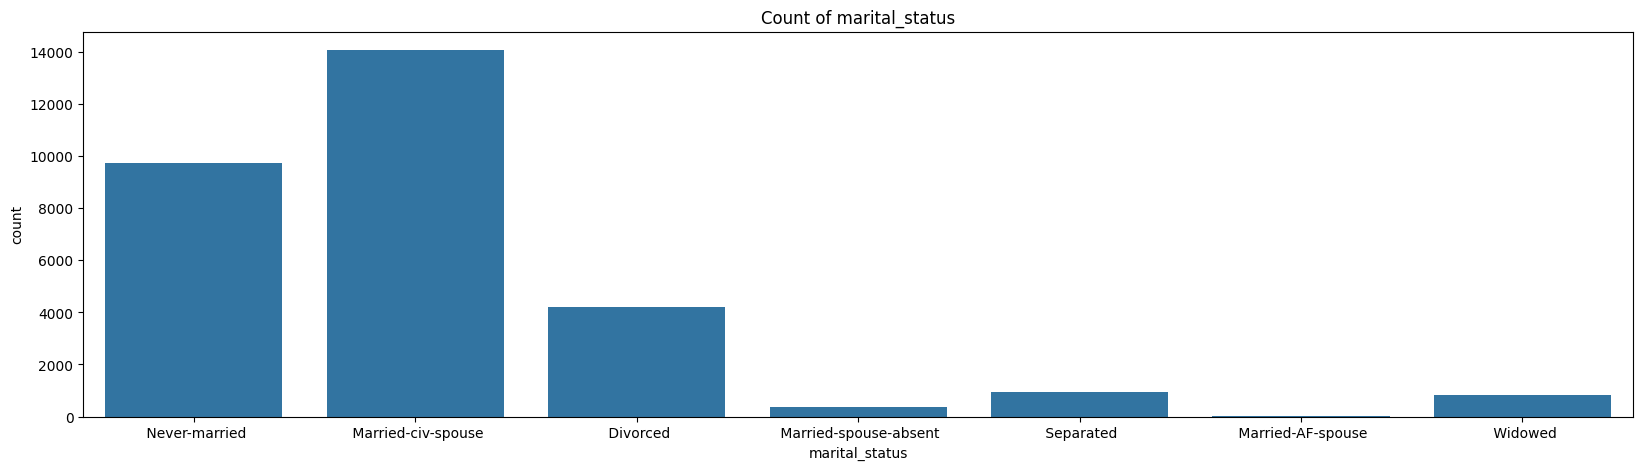

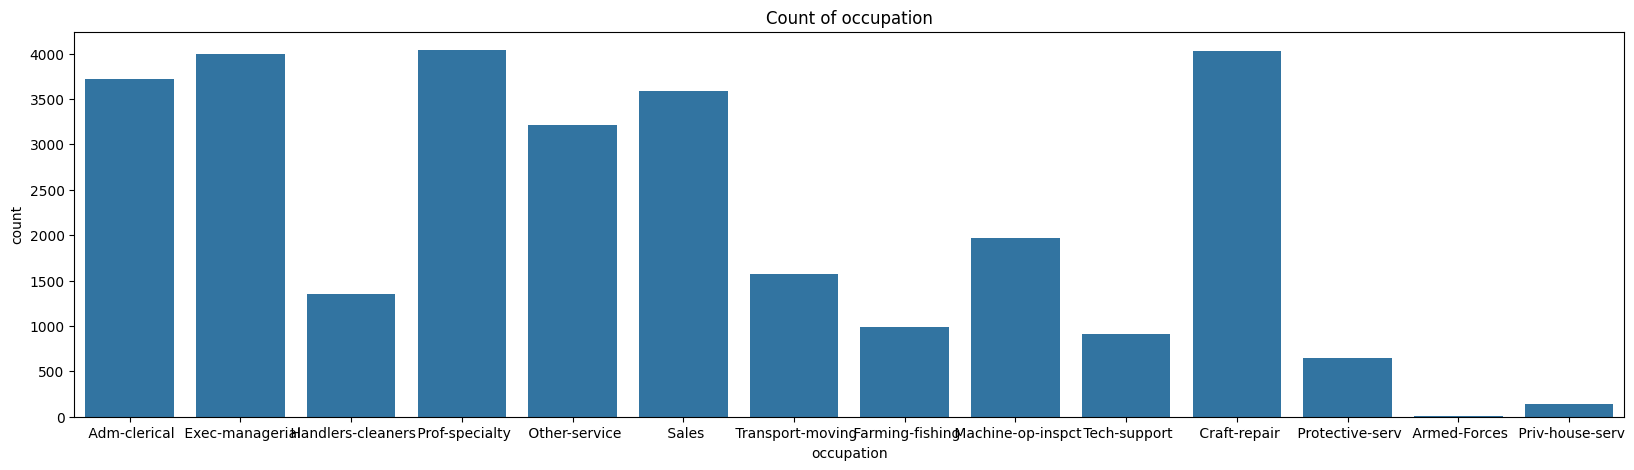

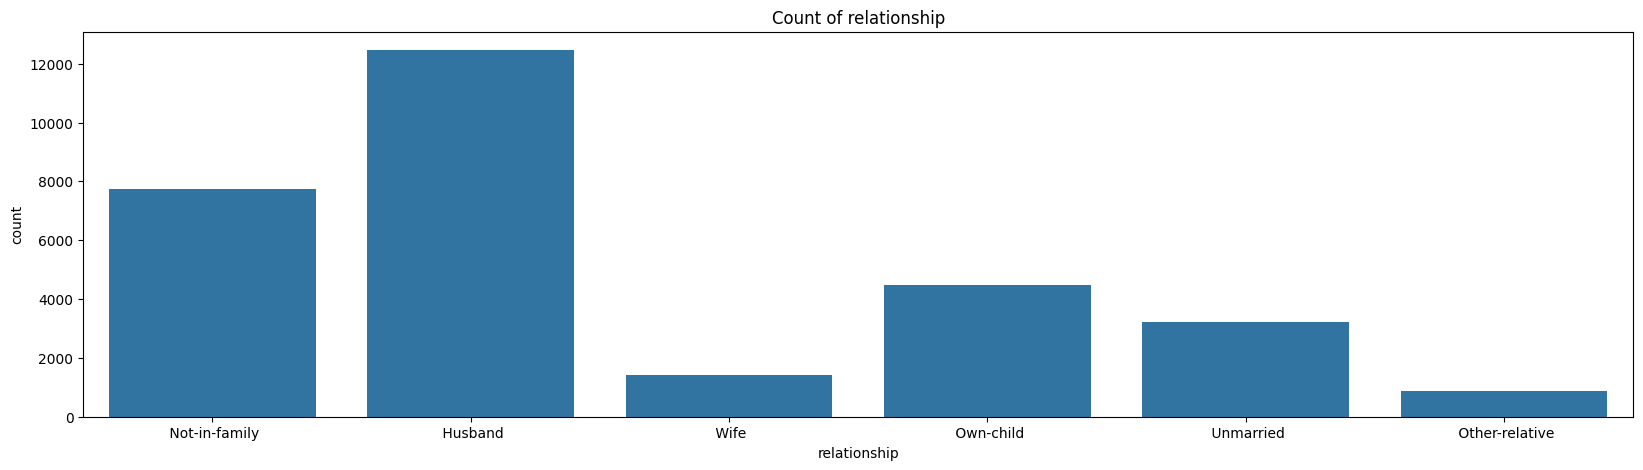

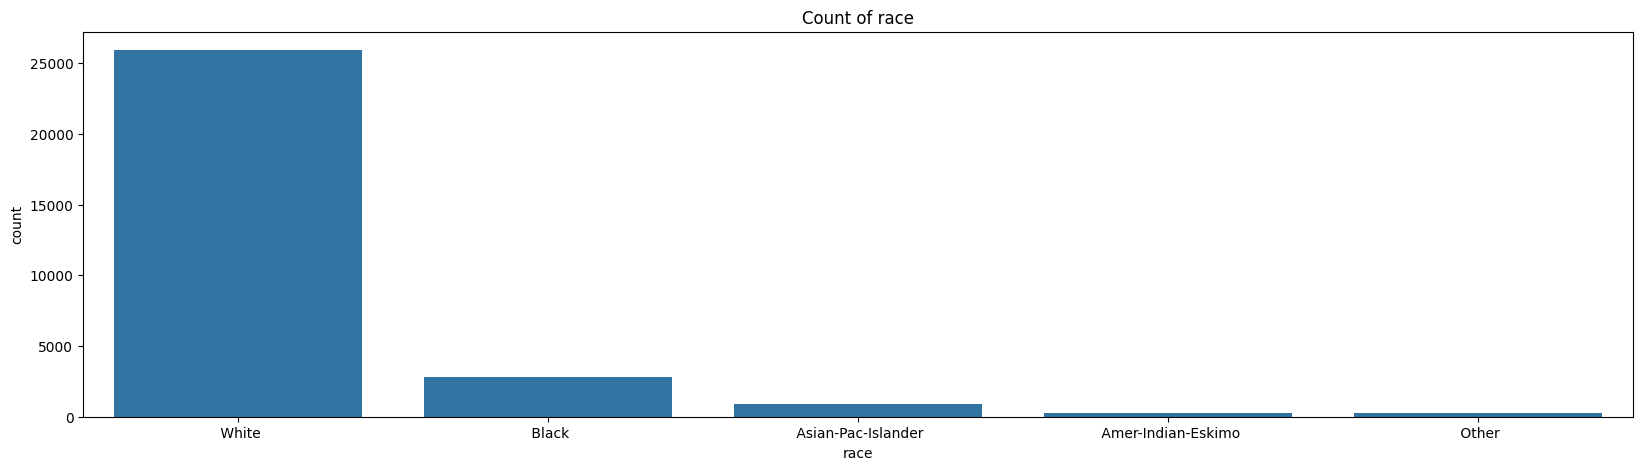

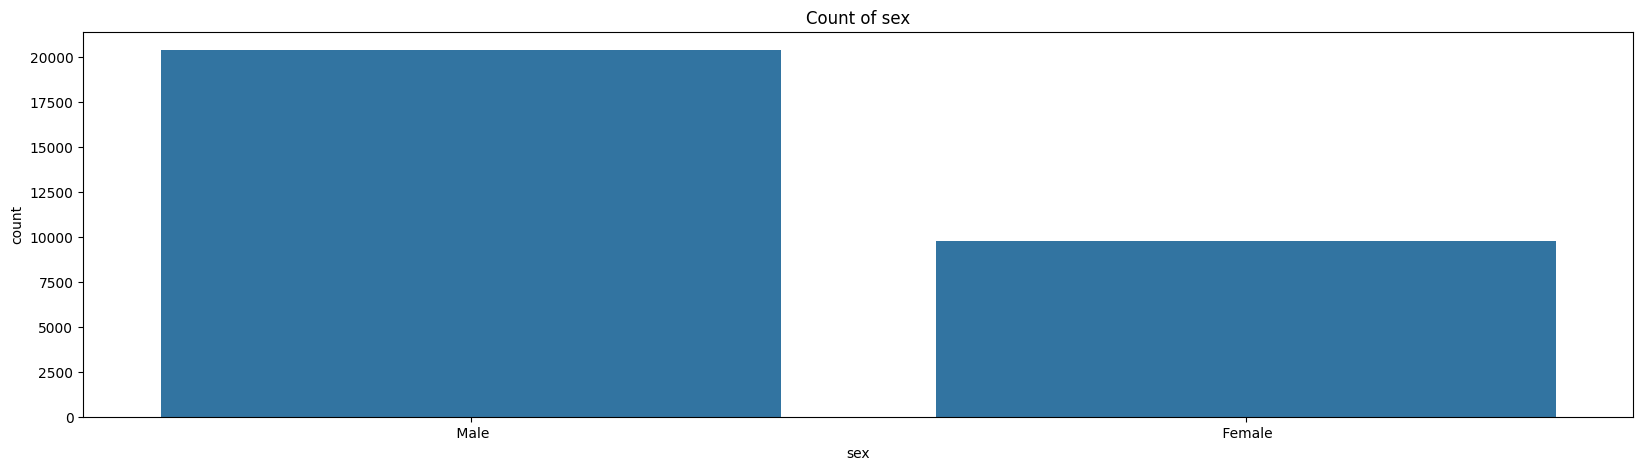

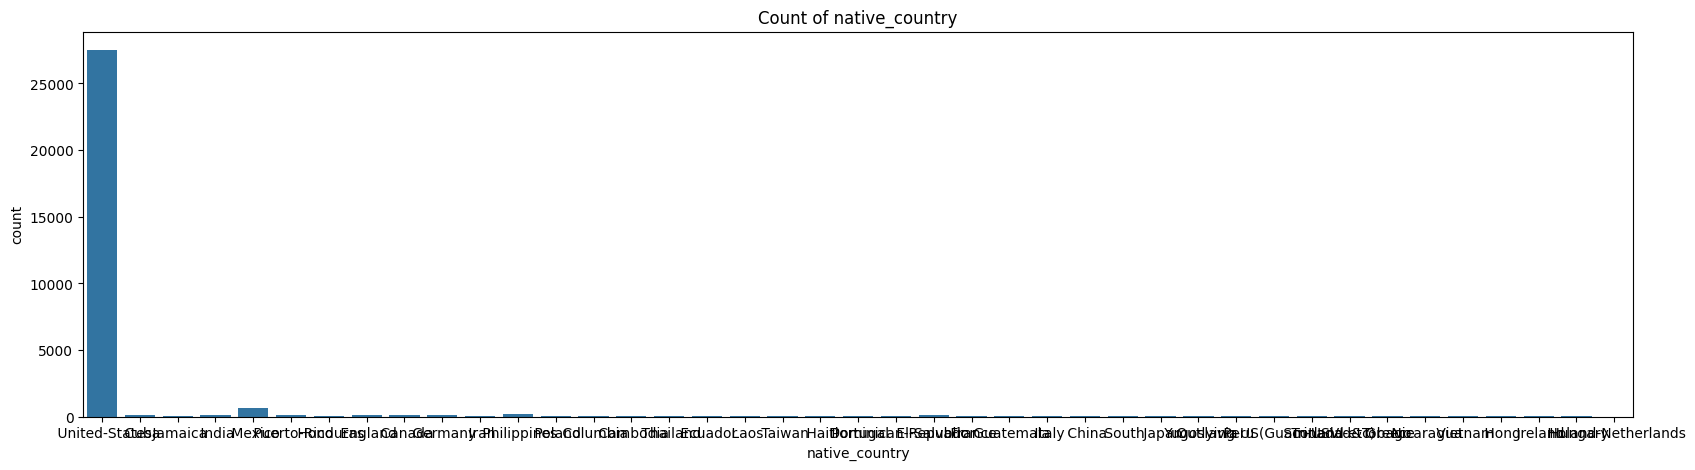

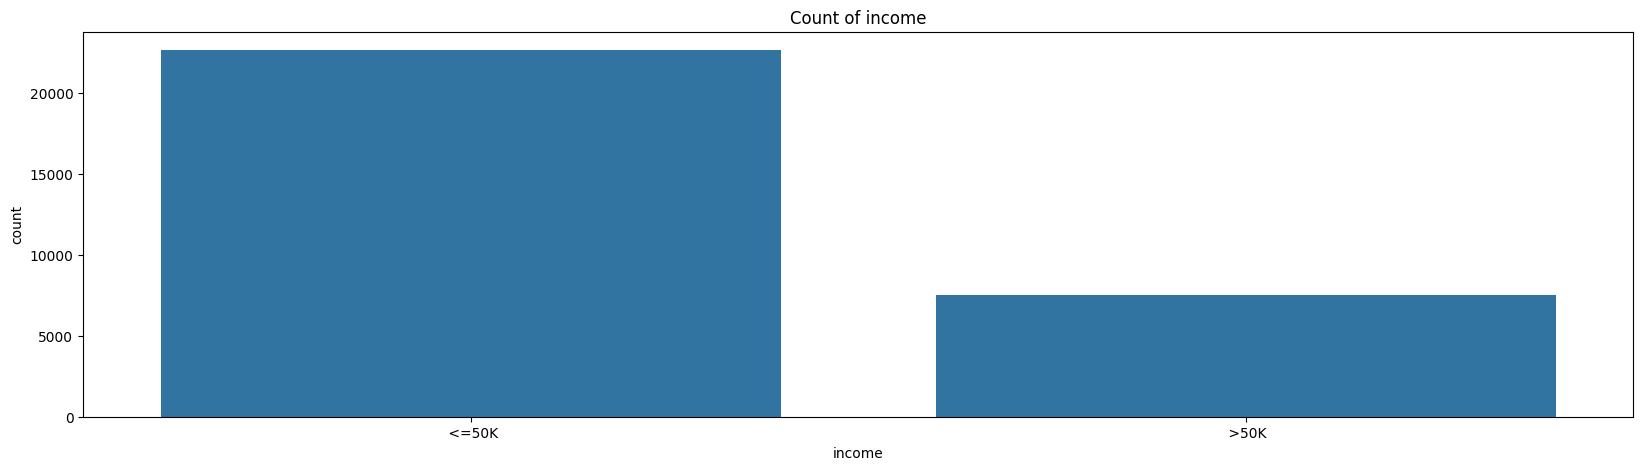

In [18]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.show()

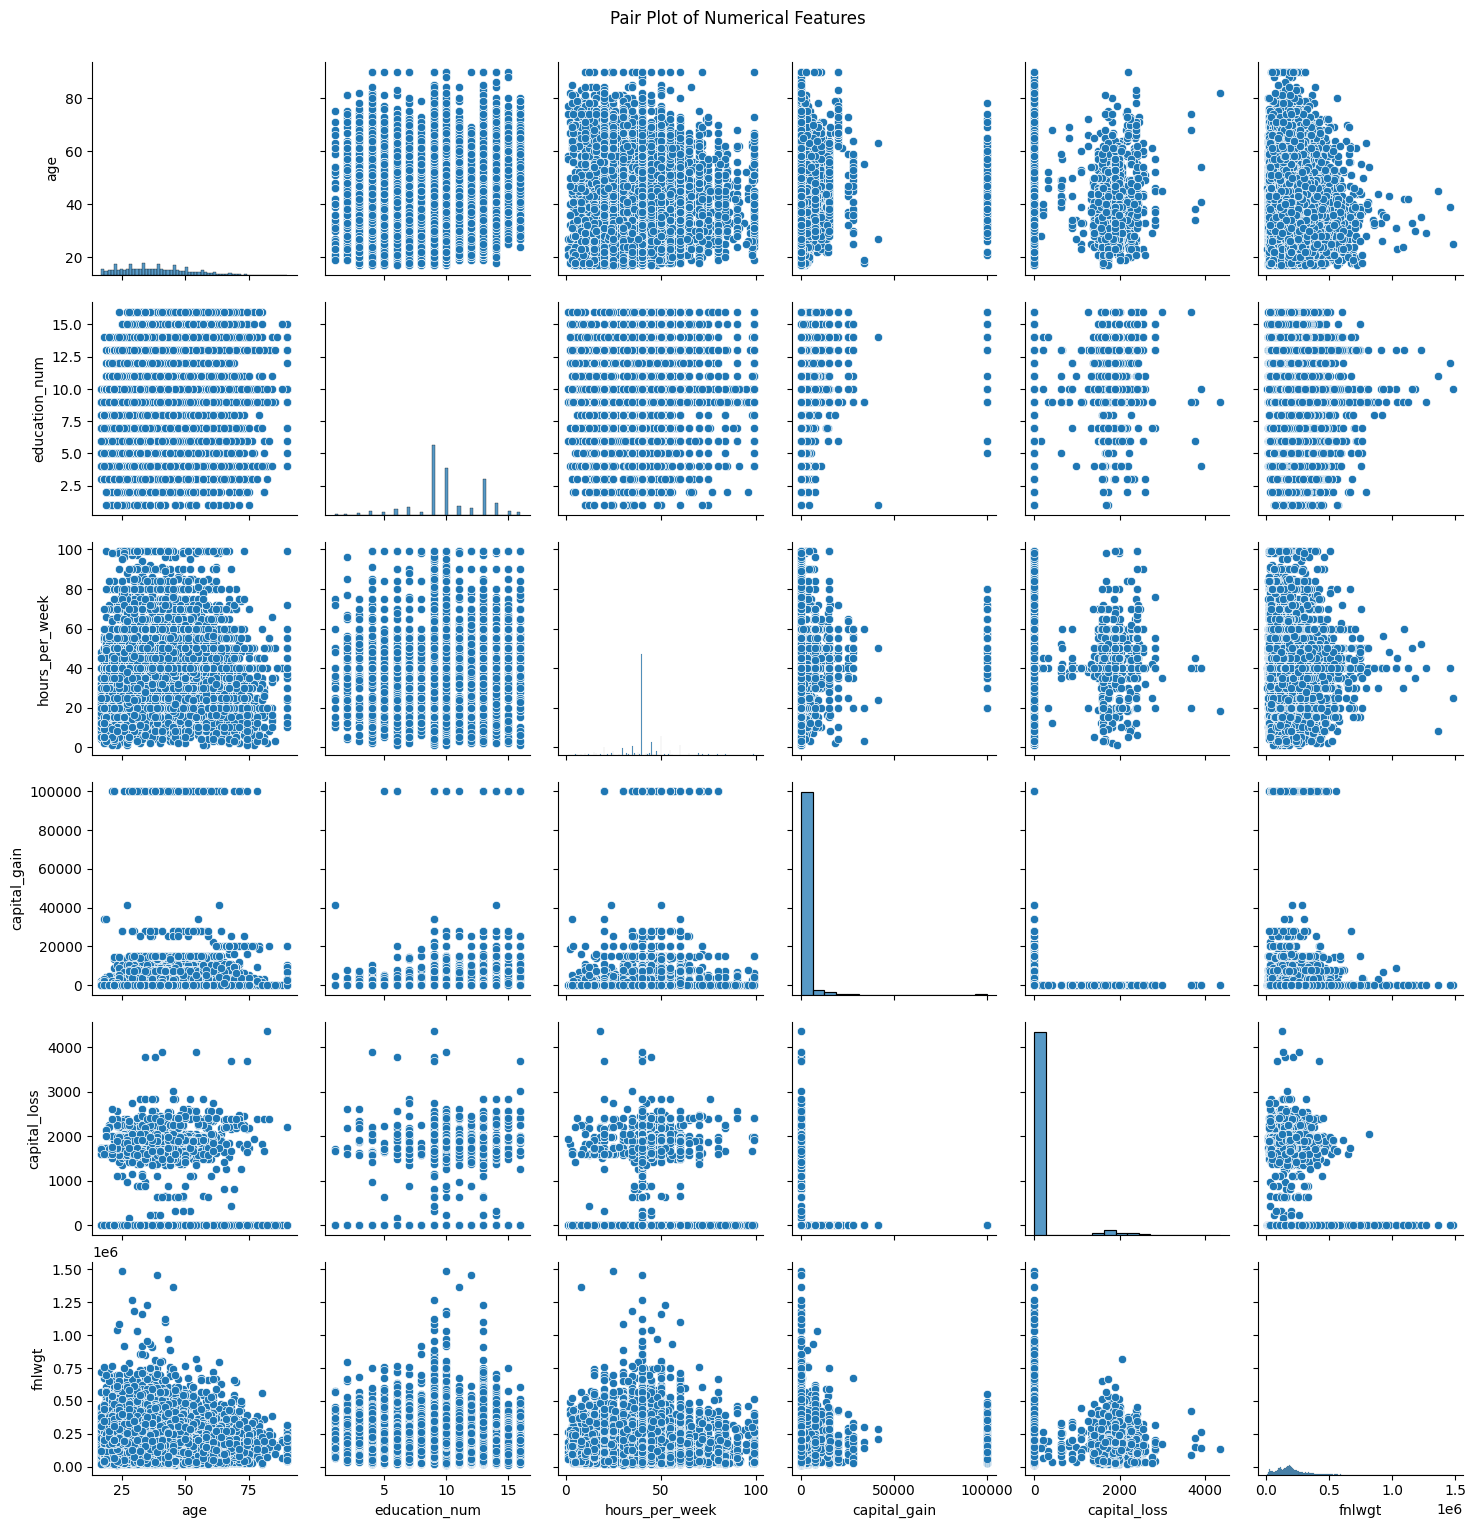

In [19]:
# Pair plot for numerical features
sns.pairplot(df[['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss', 'fnlwgt']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

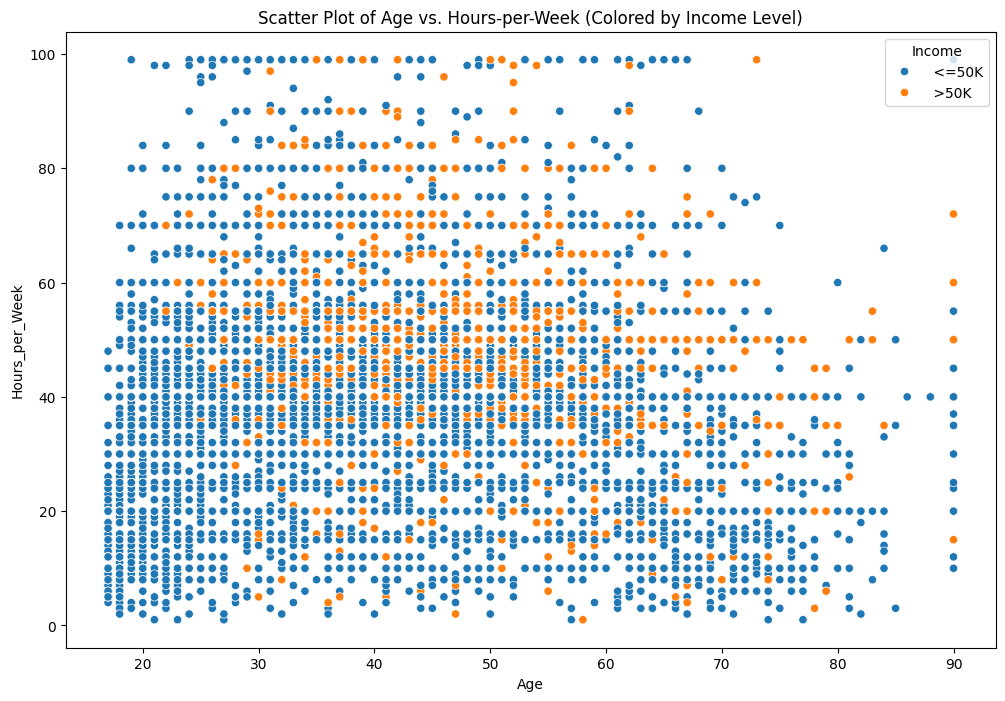

In [20]:
# Set the size of the figure for the scatter plot
plt.figure(figsize=(12, 8))
# Create a scatter plot for 'age' vs. 'hours_per_week', colored by 'income'
sns.scatterplot(x='age', y='hours_per_week', hue='income', data=df)

plt.title('Scatter Plot of Age vs. Hours-per-Week (Colored by Income Level)')
plt.xlabel('Age')
plt.ylabel('Hours_per_Week')
# Display the legend in the upper right with 'Income' as the title
plt.legend(title='Income', loc='upper right')
plt.show()


#### Income vs Hours per week

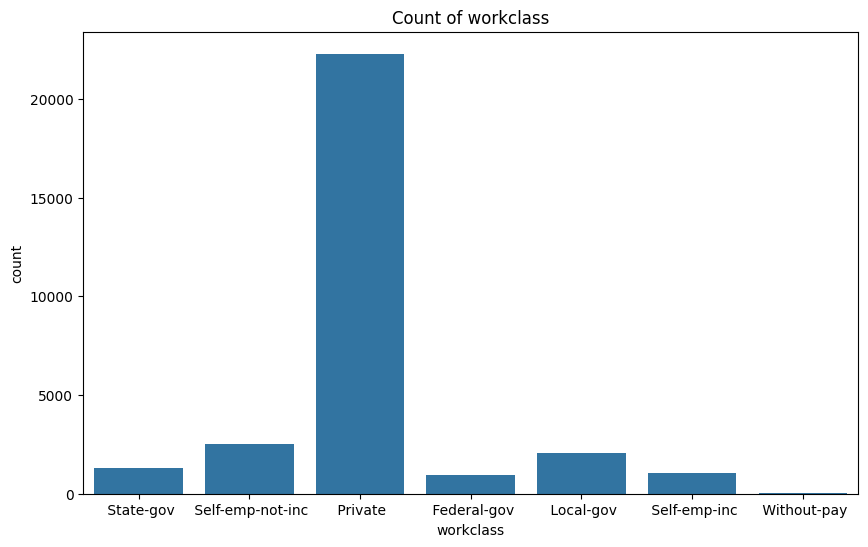

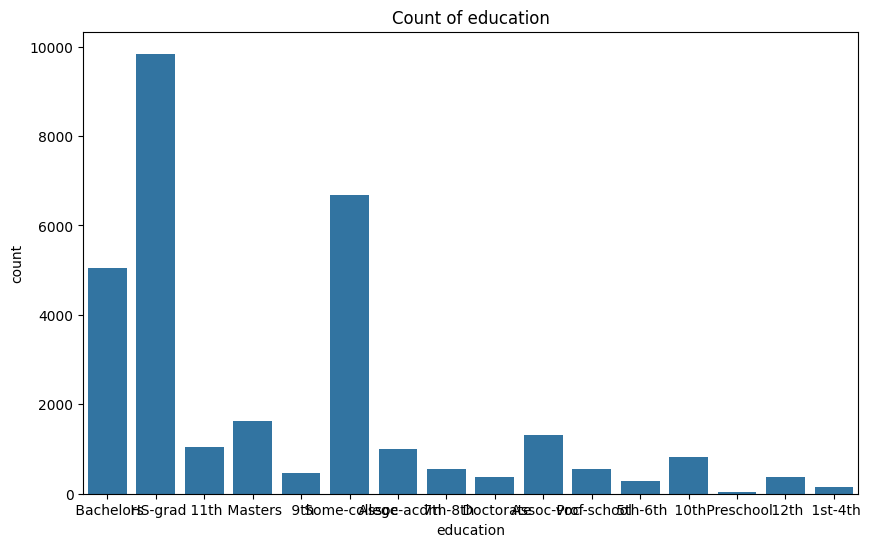

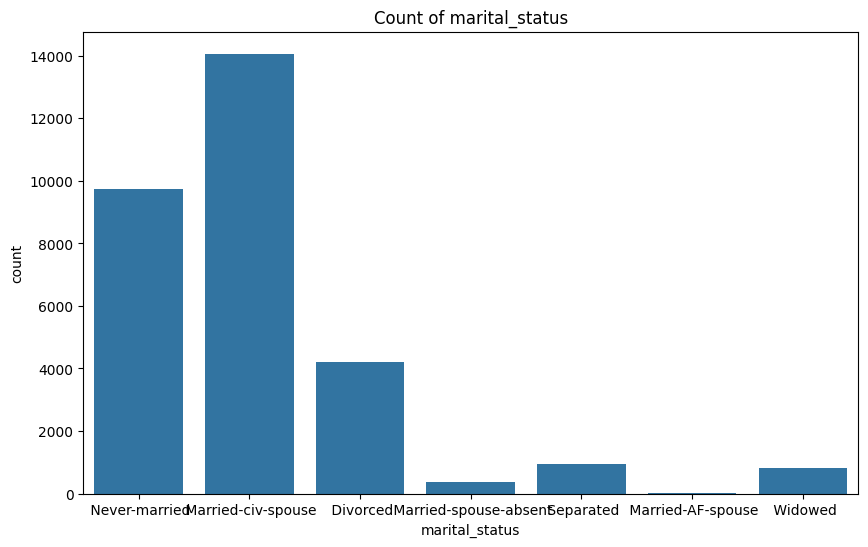

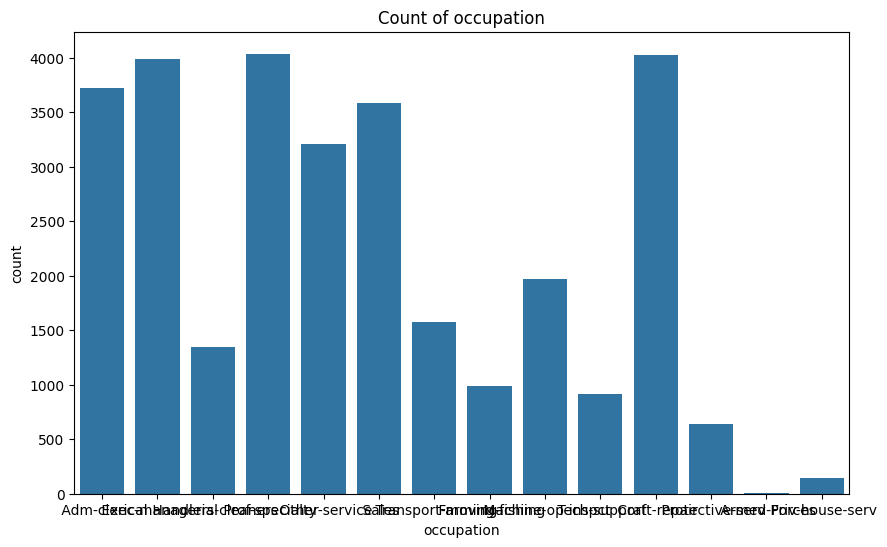

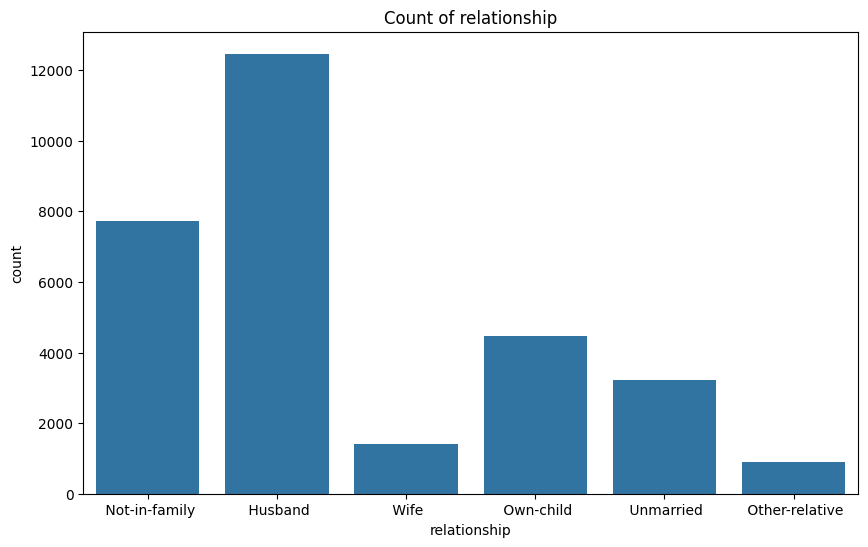

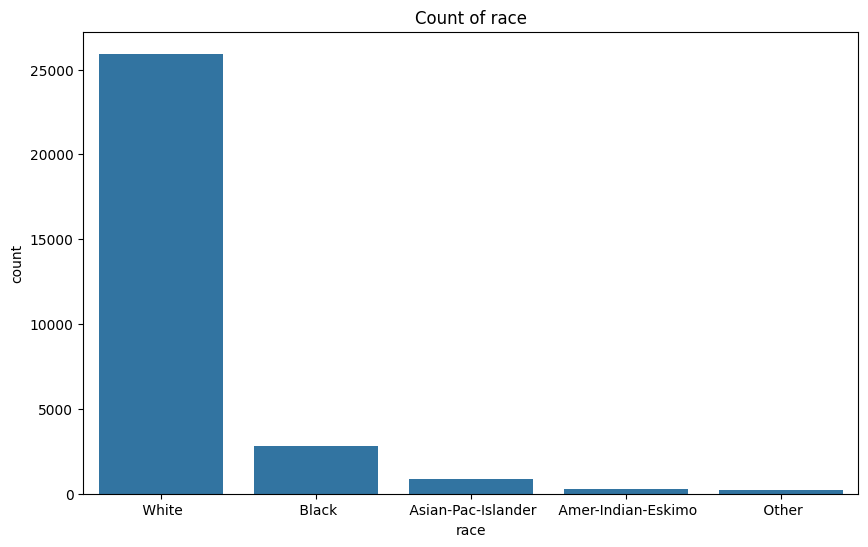

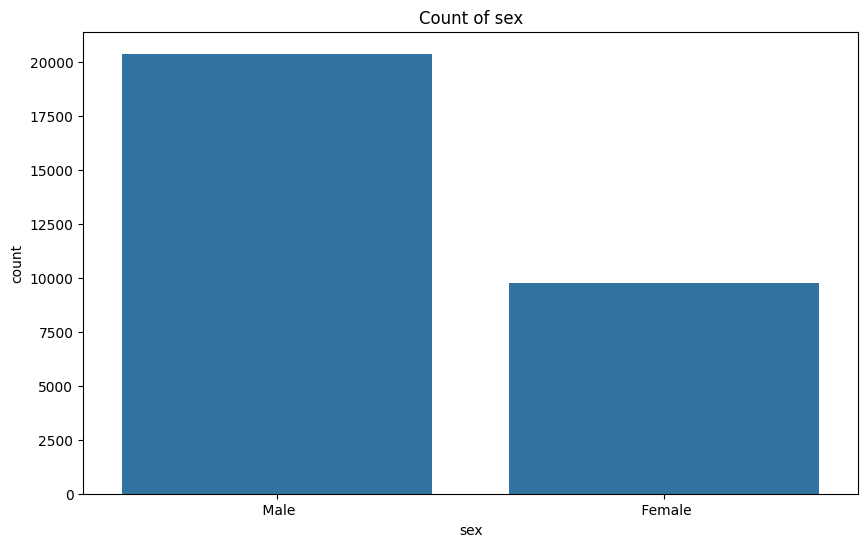

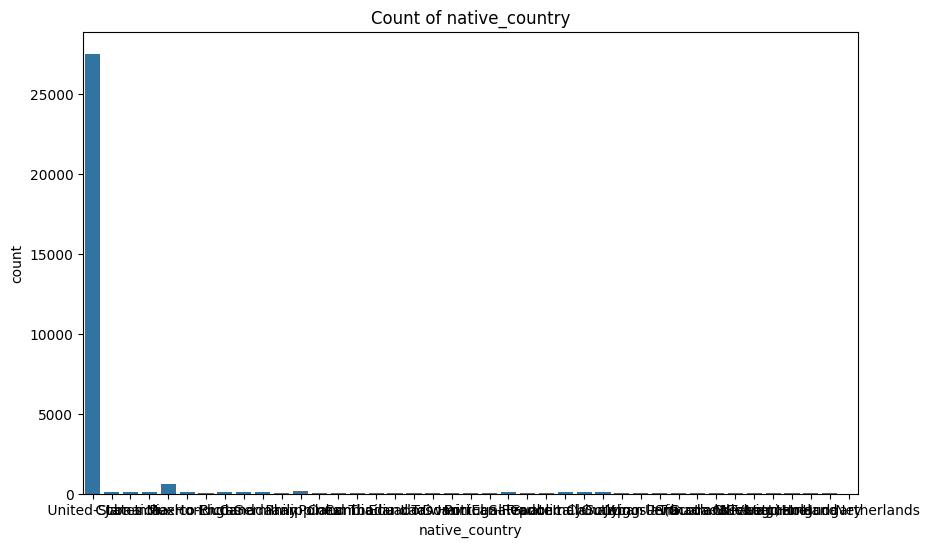

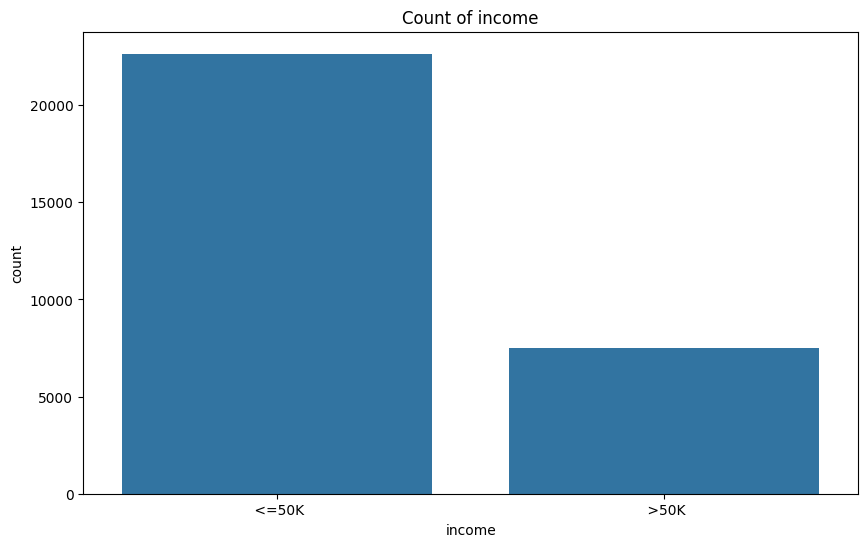

In [21]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.show()

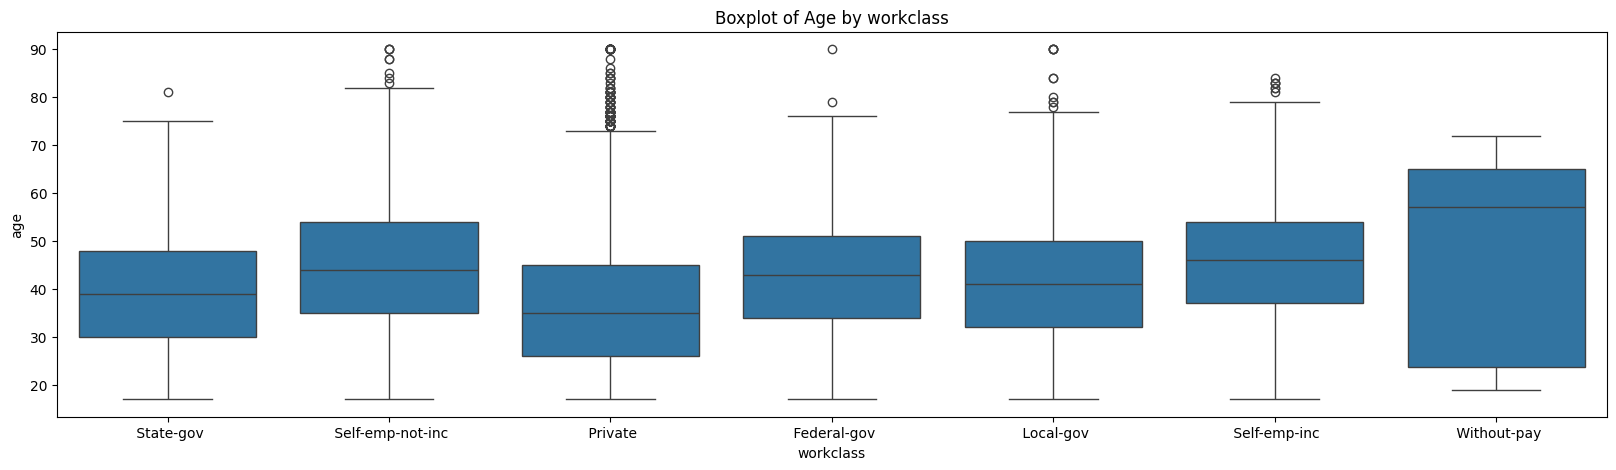

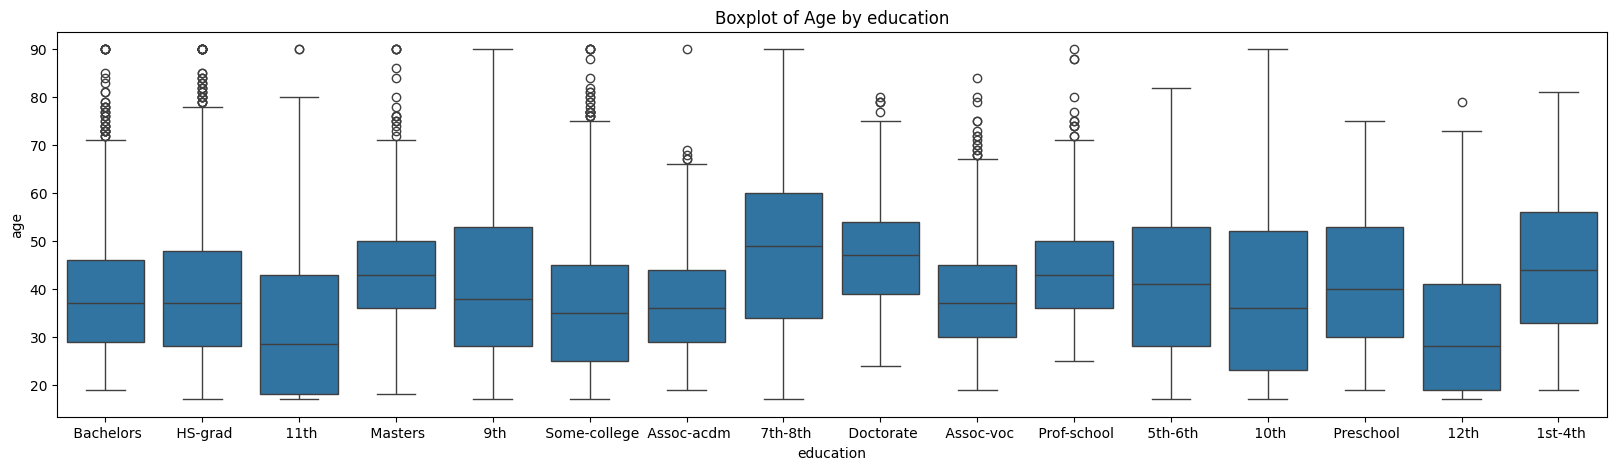

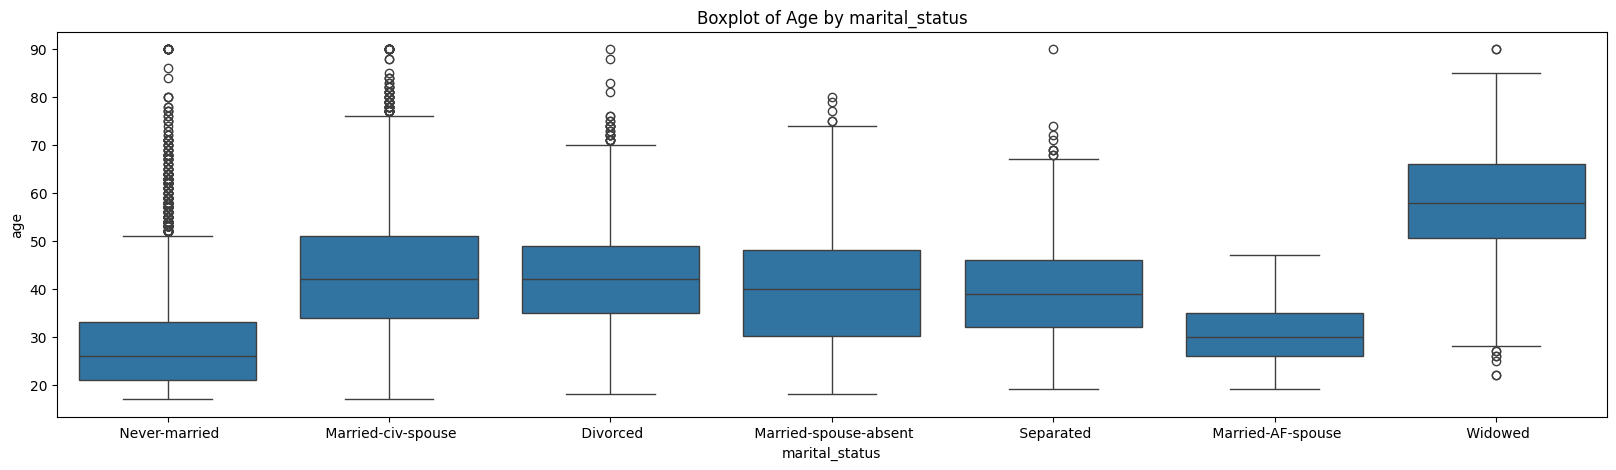

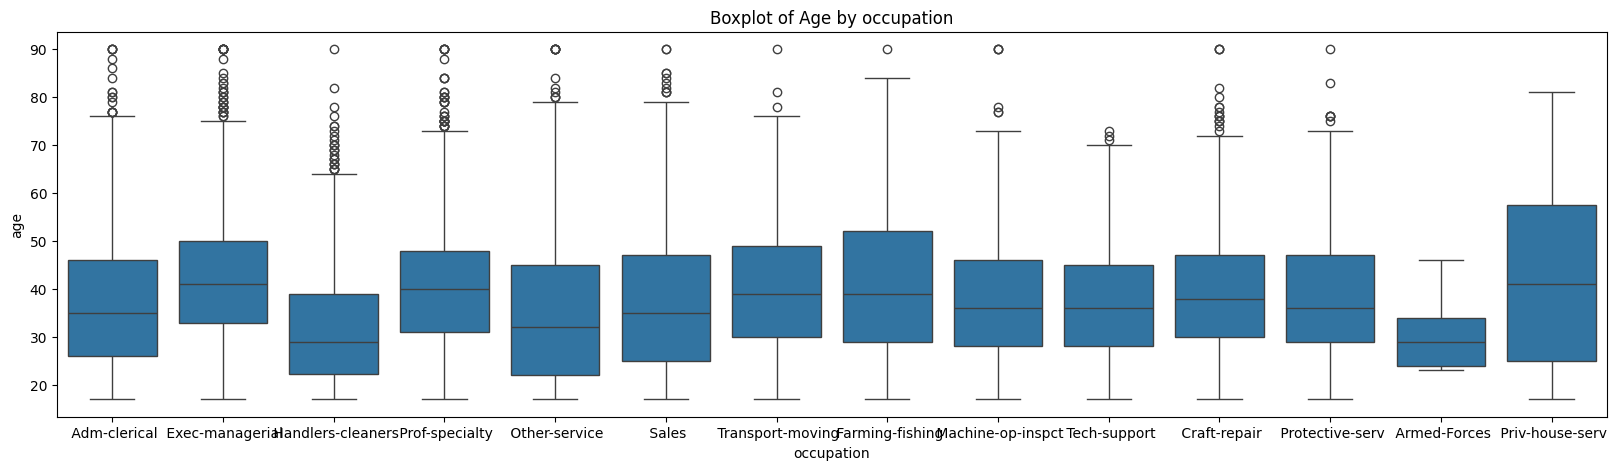

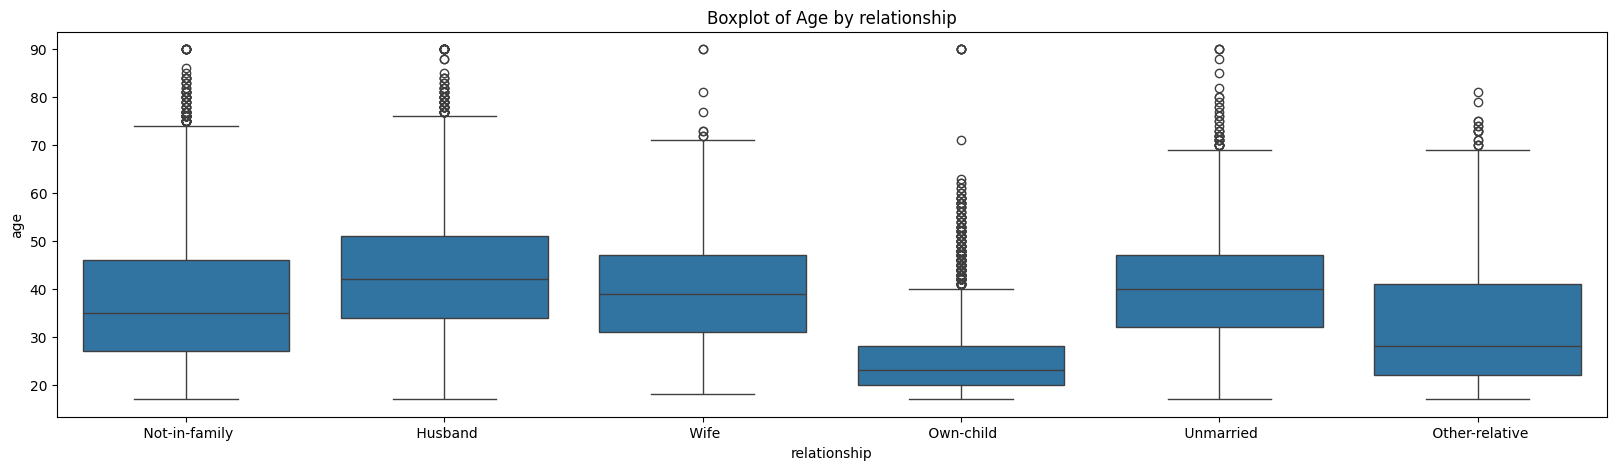

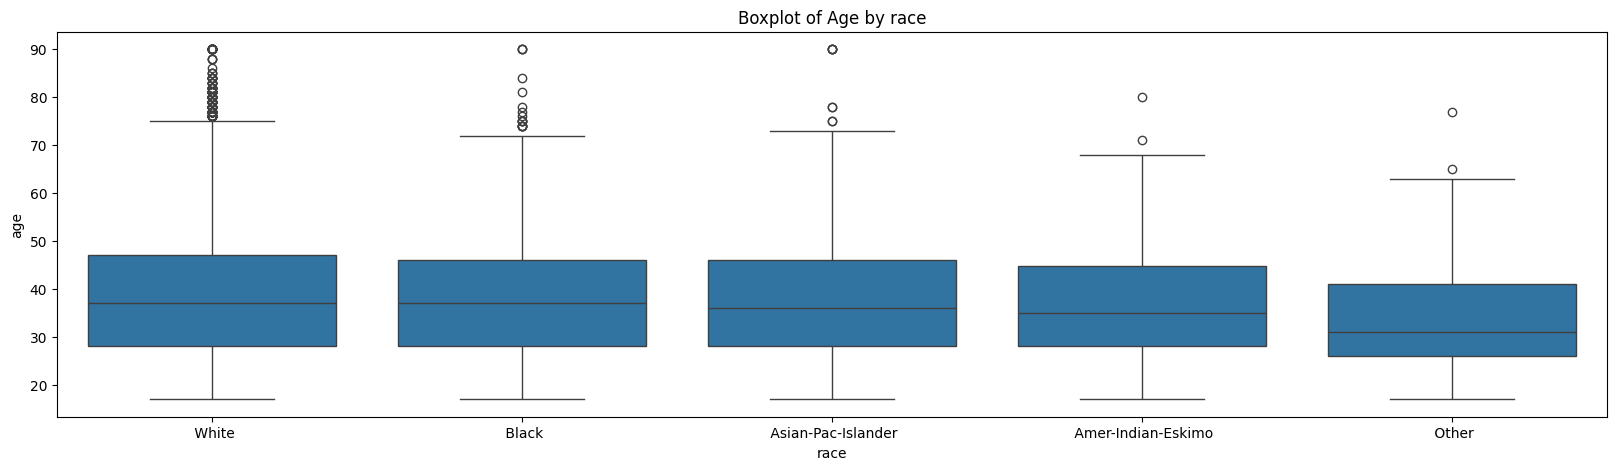

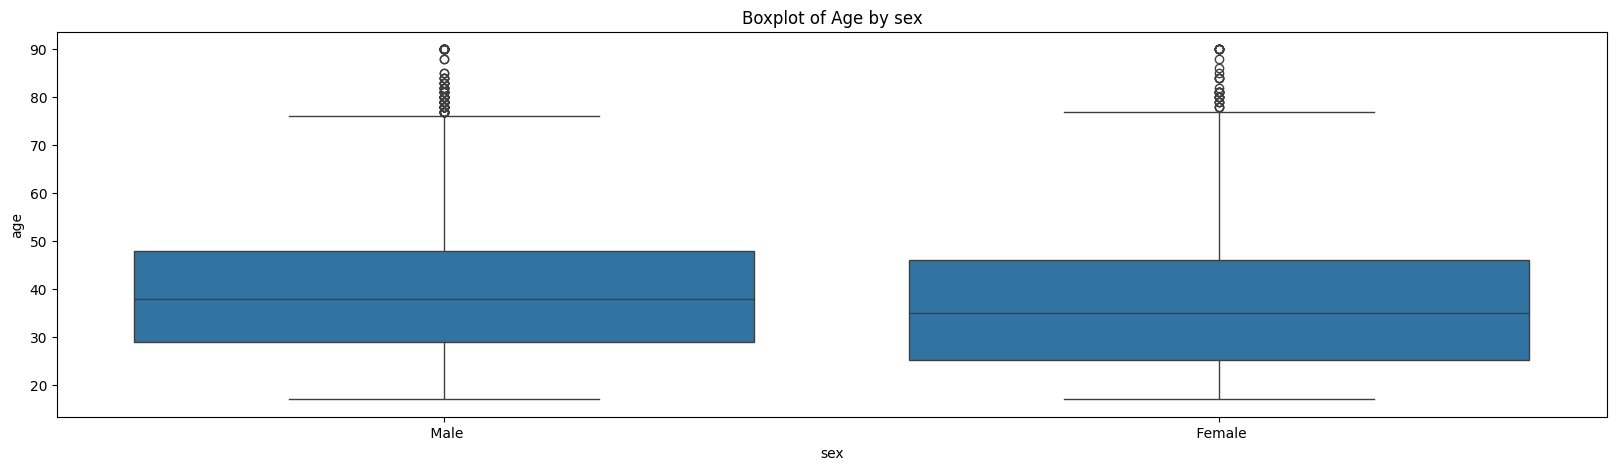

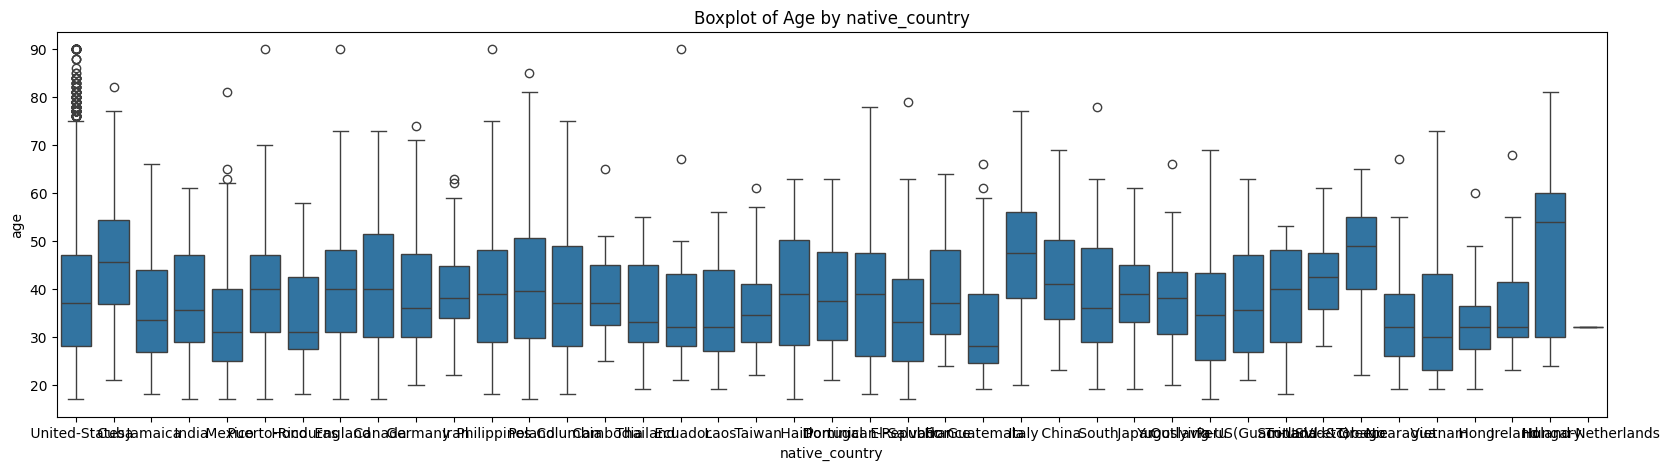

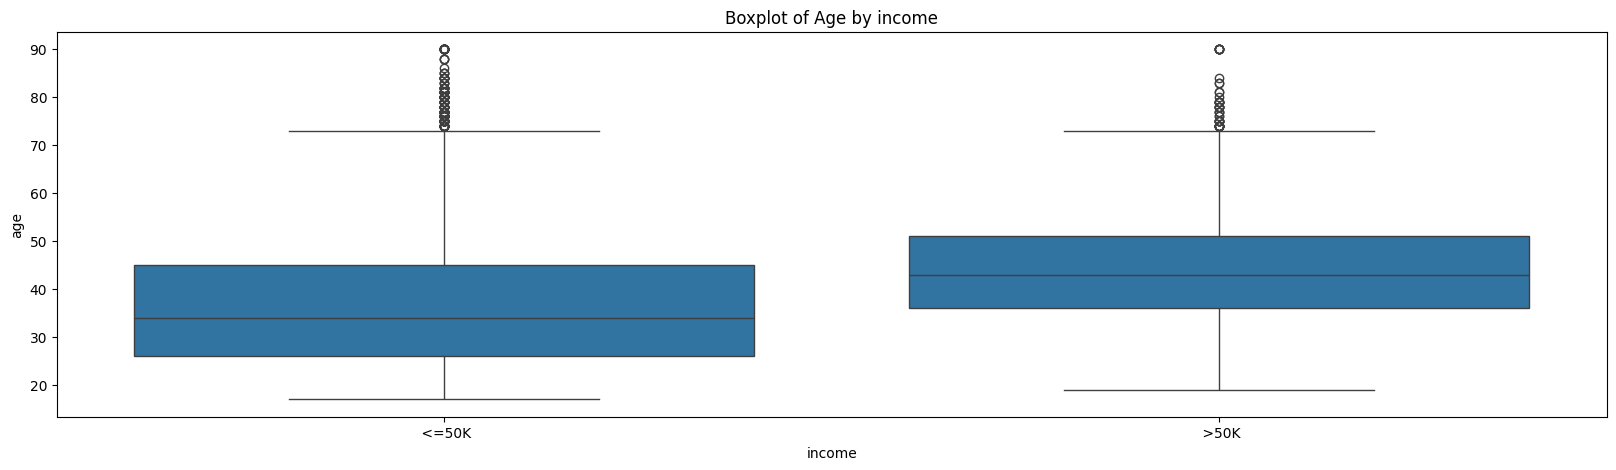

In [22]:
# Boxplot for categorical columns vs. numeric columns
for column in categorical_columns:
    plt.figure(figsize=(20, 5))
    sns.boxplot(data=df, x=column, y='age')
    plt.title(f'Boxplot of Age by {column}')
    plt.show()

#### Correlation Matrix

<ipython-input-23-fa220de25d2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


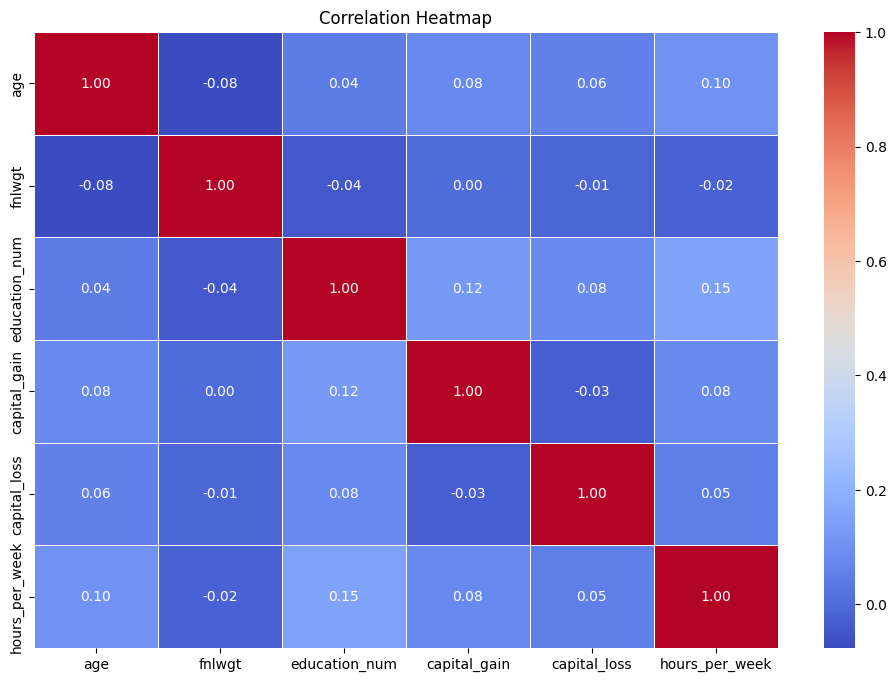

In [23]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
# Create a heatmap with annotations, using the 'coolwarm' color map and formatting values to two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Data Splitting and Preprocessing

In [24]:


# Assuming 'income' is the target variable
X = df.drop(['income'], axis=1)

# Convert the target variable to numerical values
y = np.where(df['income']==' <=50K',0,1).reshape(-1)

# One-hot encode categorical columns
X = pd.get_dummies(X)
columns=list(X.columns)[:90]




Explained variance ratio: 0.9519395674103263


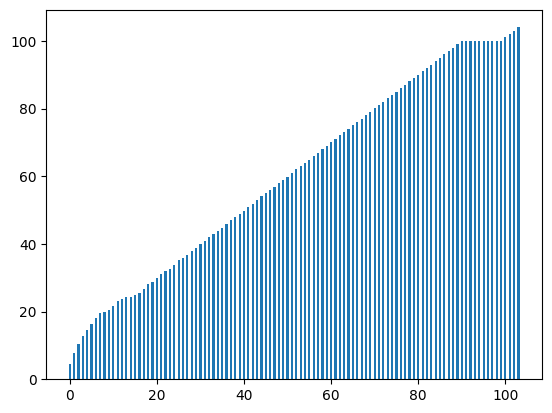

array([[ 0.51821068, -2.44239648, -0.59109703, ...,  0.4011028 ,
         0.32538723,  0.4421365 ],
       [-2.84879264, -1.42727303, -0.0632561 , ..., -1.03830454,
         1.35312398,  0.12224899],
       [ 0.80097833,  0.87338866, -1.20573024, ..., -0.05964325,
        -0.28974481,  0.48282364],
       ...,
       [ 2.36158276, -0.85860917,  0.30270404, ..., -0.57082553,
        -0.31712288,  0.3332339 ],
       [ 1.9797012 ,  1.1805689 , -1.83205078, ..., -0.49360755,
        -0.04132791,  0.22015827],
       [-0.74518025, -1.717621  ,  0.56118951, ..., -0.56669104,
         0.51916899, -0.22159945]])

In [25]:
class PCA:
    def __init__(self, n):
        # Initialize the PCA object with the number of components (n)
        self.n = n
        self.components = None

    def fit(self, X):
        # Fit the PCA model to the input data (X)
        # Calculate the covariance matrix
        cov = np.cov(X, rowvar=False)
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        # Compute eigenvalues and eigenvectors
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)

        self.components = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:self.n]])
         # Calculate explained variance ratio
        explained_variance_ratio = eigen_values[:self.n].sum() / eigen_values.sum()
        cumulative_data = np.cumsum(eigen_values)
        print("Explained variance ratio:", explained_variance_ratio)

        plt.bar(range(X.shape[1]), cumulative_data, width=0.5)
        plt.show()

         # Transform the input data using the selected components
    def transform(self, X):
        return np.dot(X, self.components.T)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

model_PCA = PCA(n=90)
model_PCA.fit(X_scaled)
X = model_PCA.transform(X_scaled)

X

In [26]:
X=pd.DataFrame(X,columns=columns)

In [27]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua
0,0.518211,-2.442396,-0.591097,-1.419615,0.329773,-1.886072,-0.056484,-0.668052,0.647209,-1.308481,...,1.043925,-0.404989,-0.808554,-0.782030,-0.522615,1.242298,0.036652,0.401103,0.325387,0.442137
1,-2.848793,-1.427273,-0.063256,-0.034886,0.129270,-0.424847,0.968925,-1.110150,1.010504,1.594196,...,-0.625197,1.625257,-0.979060,-1.563181,0.679245,-0.585288,-0.956981,-1.038305,1.353124,0.122249
2,0.800978,0.873389,-1.205730,0.502657,0.457480,-0.680879,-2.665488,-0.059993,-0.881951,-1.006403,...,-0.335532,0.200045,0.145834,-0.686484,0.181388,-0.047443,0.624793,-0.059643,-0.289745,0.482824
3,-0.712682,2.544531,0.760717,0.146256,-3.036790,-0.263812,0.144154,2.359760,-0.482797,1.144328,...,0.645187,-1.445519,-0.283020,-0.024918,-0.427305,0.868318,-0.525228,-0.307941,-0.063885,0.289954
4,1.113507,-1.475848,4.615605,-0.323462,0.700442,2.268233,2.488115,3.405888,0.177266,0.965844,...,0.749005,-2.345310,-1.965827,1.752626,-1.374267,-0.214170,1.152256,-0.063466,0.120447,0.825883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.778658,-1.556566,-0.009939,0.545224,0.339534,3.423918,2.321769,0.558734,0.545306,-1.140126,...,0.225123,-0.799280,0.121760,0.640010,-0.139081,-0.333009,0.139773,-0.273083,-0.138024,0.286606
30158,-1.709274,1.755265,-0.622946,0.713064,-0.422301,1.261577,-0.503941,0.359281,-1.322595,-0.575081,...,-0.405238,0.230453,-0.236558,-0.555312,0.246908,0.372445,0.377561,0.073355,0.198122,-0.001960
30159,2.361583,-0.858609,0.302704,4.089668,0.268624,1.257399,-0.255361,-1.112020,-0.824703,-0.021962,...,1.535301,-0.041937,0.386278,1.126415,-0.128557,0.839855,0.037217,-0.570826,-0.317123,0.333234
30160,1.979701,1.180569,-1.832051,-1.597305,-0.643085,0.210419,0.788122,-0.809502,-0.608762,-1.004725,...,0.417861,0.303082,0.089924,-1.372015,0.474361,-0.605348,-0.861337,-0.493608,-0.041328,0.220158


In [28]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

@dataclass
class LogisticRegression:


    def __init__(self,X,y,Learning_Rate,max_iterations,epsilon):
        # Initialize Logistic Regression with hyperparameters
        self.Learning_Rate=Learning_Rate
        self.max_iterations=max_iterations
        self.epsilon=epsilon
        self.X=X.values.astype(float)
        self.y=y
        self.X_train,self.X_test,self.y_train,self.y_test=self.split_data()
    def split_data(self, test_size=0.3):
        X_train, X_rem, y_train, y_remainder = train_test_split(self.X, self.y, test_size=test_size,shuffle=True)
        return X_train, X_rem, y_train, y_remainder

    def Normalize_data(self,X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        X=self.addX0(X)
        return X,mean,std

    def normalize_test(self,X,mean,std):
        X=(X-mean)/std
        X=self.addX0(X)
        return X


    def addX0(self, X): # Add ones to cater the intercept
        return np.column_stack([np.ones(X.shape[0]), X])


    def sigmoid(self, z): # This will give sigmoid function value
        sig = 1 / (1 + np.exp(-z))
        return sig



    def costFunction(self, X, y):# Loss function minimization
        sig = self.sigmoid(X.dot(self.w))
        loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
        cost = - loss.sum()
        return cost

    def gradient(self, X, y): # Loss function for gradient descent

        sig = self.sigmoid(X.dot(self.w))
        return (sig - y).dot(X)

    def gradientDescent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iterations), colour='red'):
            self.w = self.w - self.Learning_Rate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            errors.append(current_error)

            if np.abs(prev_error - current_error) < self.epsilon:
                break
            prev_error = current_error
        self.plot_cost(errors)

    def predict(self,X): # It will compute the probability value for a given
                           # point and output 0 or 1 depending on whether the probability is greater or less than 0.5.
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)



    def fit(self):

        self.w = 0.0001* np.ones(self.X_train.shape[1]+1, dtype=np.float64)
        self.X_train,mean,std=self.Normalize_data(self.X_train)

        self.X_test=self.normalize_test(self.X_test,mean,std)
        self.gradientDescent(self.X_train, self.y_train)

        self.y_hat_train = self.predict(self.X_train)


    def plot_cost(self, cost_sequence):

        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost', title='Cost Trend')
        ax.grid()
        plt.show()

    def plot(self):

        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 1], self.X_train[:, 2],
                     self.sigmoid(self.X_train.dot(self.w)),
                     c=self.y_train[:], cmap='viridis', s=100)

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation=0)
        plt.show()


    def scatterPlt(self):

        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w[1:]).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14, 12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X_train[:, 1], self.X_train[:, 2],
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        plt.show()

    def plot3D(self):

        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w[1:]).reshape(xx.shape)
        fig = plt.figure(figsize=(14, 12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 1], self.X_train[:, 2],
                     c=self.y_train[:], s=50,
                     cmap="RdBu", vmin=-.2, vmax=1.2,
                     edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3')


 27%|██▋       | 2731/10000 [00:25<01:08, 106.32it/s]


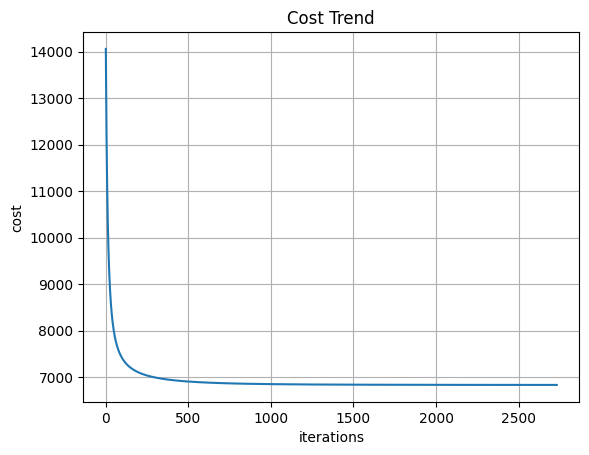

In [29]:
# Training model on basis of training data

lr = LogisticRegression(X=X,y=y,epsilon=0.001, Learning_Rate = 0.00001, max_iterations = 10000)
lr.fit()


In [30]:
lr.predict(lr.X_train)

array([0., 0., 1., ..., 1., 0., 0.])

In [31]:
# def accuracy(y, y_hat):
#         count=0
#         for i,value in enumerate(y):
#             if y[i]==y_hat[i]:
#                 count=count+1
#         return count/len(y)*100
train_start_time = datetime.now()
def accuracy_train(y_train,y_preds):
        train_end_time = datetime.now()
        print('y_preds: ', y_preds)
        print('y_preds shape: ', y_preds.shape)
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        count7 = 0
        count8 = 0
        count9 = 0
        count10 = 0
        total_correct = 0
        for i in range(len(y_train)):
                if int(y_train[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if y_train[i] == 0:
                        count0+=1
                    elif y_train[i] == 1:
                        count1+=1
                    elif y_train[i] ==2:
                        count2+=1
                    elif y_train[i] ==3:
                        count3+=1
                    elif y_train[i] ==4:
                        count4+=1
                    elif y_train[i] ==5:
                        count5+=1
                    elif y_train[i] ==6:
                        count6+=1
                    elif y_train[i] ==7:
                        count7+=1
                    elif y_train[i] ==8:
                        count8+=1
                    elif y_train[i] ==9:
                        count9+=1
                    else:
                        count10+=1
        train_time = train_end_time - train_start_time
        total_wrong = count0+count1+count2+count3+count4+count5+count6+count7+count8+count9+count10
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print(classification_report(y_train, y_preds))
        print('Train_Time: ', train_time)
        return rate

In [32]:
accuracy_train(lr.y_test,lr.predict(lr.X_test))

y_preds:  [0. 0. 0. ... 0. 0. 1.]
y_preds shape:  (9049,)
misclassification rate 0.1528345673555089
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6770
           1       0.74      0.60      0.67      2279

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.84      9049

Train_Time:  0:00:00.472157


0.1528345673555089

In [33]:
lr.w

array([-1.96162514e+00, -2.26264483e+00, -1.23506575e+00,  3.68675706e-01,
        1.32746079e-01,  5.97284206e-02,  6.23114396e-01, -1.98061303e-01,
        4.80420919e-01, -1.87274605e-02,  4.36600584e-01, -1.03657388e-02,
        3.93879670e-01, -7.56873768e-02,  1.84527279e-01,  5.64889192e-01,
        1.41245665e-01,  1.66317165e-01, -2.63468763e-01, -6.62924902e-01,
        2.44045198e-01, -3.37182865e-01,  2.59492379e-02, -5.93506894e-03,
        3.23333605e-01, -1.60453077e-01, -5.99987328e-04,  9.23956677e-02,
       -4.39312519e-02,  9.40802196e-02, -1.39052916e-01,  6.64054352e-02,
       -1.08485759e-01, -2.74959656e-01, -9.92947730e-02,  2.75737292e-02,
        2.10424248e-01,  1.07630862e-01,  2.14446033e-01,  1.32414579e-01,
        2.20142086e-02, -1.66193125e-01,  7.91852662e-02,  2.89576884e-01,
        1.94969314e-01, -1.12143081e-01,  5.96692234e-02,  2.25966926e-03,
       -3.10787672e-02, -7.60475781e-02, -1.45933528e-02, -1.04626178e-02,
        1.84622211e-01, -

In [34]:
def draw_matrix(true_positive, false_positive, false_negative, true_negative):
    # Visualize the confusion matrix
    matrix = np.array([[true_positive, false_negative],
                      [false_positive, true_negative]])
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.plasma_r)
    plt.colorbar()
    plt.show()


def confusion_matrix_calculator(y, y_predicted, desired_class):
    # Calculate the confusion matrix for a binary classification
    print('total y', y.size)
    print('total y_predicted', y_predicted.size)
 # Create binary masks for actual and predicted instances of the desired class
    actual = (y == desired_class)
    predicted = (y_predicted == desired_class)
    print('actual', actual.sum())
    # Calculate components of the confusion matrix
    true_positive = (actual & predicted).sum()
    false_negative = (actual & ~predicted).sum()
    false_positive = (~actual & predicted).sum()
    true_negative = (~actual & ~predicted).sum()

    return true_positive, false_negative, false_positive, true_negative

In [35]:
true_positive, false_negative, false_positive, true_negative=confusion_matrix_calculator(lr.y_test,lr.predict(lr.X_test),1)

total y 9049
total y_predicted 9049
actual 2279


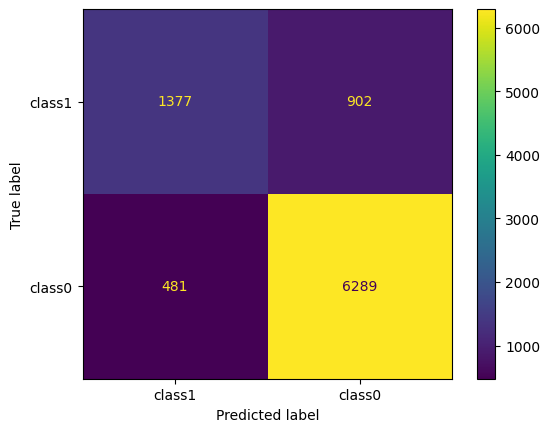

In [36]:
# Assuming lr is an instance of LogisticRegression class
cm = confusion_matrix(lr.y_test,lr.predict(lr.X_test), labels=[1,0])
# Calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()



Gaussian Naive Bayes

In [37]:
class NaiveBayes:

    def __init__(self, X, y, alpha=0,index_list=[]):

        self.X = X
        self.y = y
        self.alpha = alpha
        self.index_list=index_list

    def trainTestSplit(self):

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 20)

    def probability(self, X, prior, dist1, dist2):
        return prior * dist1 * dist2
    def fitDistribution(self,X):
        mean =np.mean(X)
        std=np.std(X)
        dist=norm(mean,std)
        return dist
    def runModel(self):
        m = 2
        alpha = self.alpha
        self.trainTestSplit()
        #code to split data into y=0 and y=1 class
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        # calculating priors on y
        self.prior_y0 = len(self.X0_train)/len(self.X_train)
        self.prior_y1 = len(self.X1_train)/len(self.X_train)
        category_indexes=np.arange(0,len(self.X_train.columns))[6:]
        self.distribution_lists_class0=[]
        self.distribution_lists_class1=[]
        for x in self.index_list:
            self.distribution_lists_class0.append(self.fitDistribution(self.X0_train[:x]))
            self.distribution_lists_class1.append(self.fitDistribution(self.X1_train[:x]))

        self.likelyhood_list_class0_value0=[]
        self.likelyhood_list_class0_value1=[]
        self.likelyhood_list_class1_value0=[]
        self.likelyhood_list_class1_value1=[]
        for index in tqdm(category_indexes, colour='red'):
            for class_value in [0,1]:
                for actual_value in [0,1]:
                    if class_value==0:
                        if actual_value==0:
                            self.likelyhood_list_class0_value0.append((len(self.X0_train[:index][self.X0_train[:index]==0])+
                                                                       alpha)/(len(self.X0_train)+(m*alpha)))
                        if actual_value==1:
                            self.likelyhood_list_class0_value1.append((len(self.X0_train[:index][self.X0_train[:index]==1])+
                                                                       alpha)/(len(self.X0_train)+(m*alpha)))
                    else :

                        if actual_value==0:
                            self.likelyhood_list_class1_value0.append((len(self.X1_train[:index][self.X1_train[:index]==0])+
                                                                       alpha)/(len(self.X1_train)+(m*alpha)))
                        if actual_value==1:
                            self.likelyhood_list_class1_value1.append((len(self.X1_train[:index][self.X1_train[:index]==1])+
                                                                       alpha)/(len(self.X1_train)+(m*alpha)))


    def predict(self):
        self.prediction_list=[]
        for sample in self.X_test.iterrows():
            class_0_probability=1
            class_1_probability=1
            #for i in index_list:
                    #class_0_probability=class_0_probability*self.distribution_lists_class0[i].pdf(float(list(sample[1])[i]))
                    #class_1_probability=class_1_probability*self.distribution_lists_class1[i].pdf(float(list(sample[1])[i]))
            for index in np.arange(0,len(self.X_train.columns)-6):
                # sample belongs to class 0
                if list(sample[1])[index] == 1:
                    class_0_probability = class_0_probability*self.likelyhood_list_class0_value1[index]
                else:
                    class_0_probability =class_0_probability*self.likelyhood_list_class0_value0[index]

            # sample belongs to class 1

                if list(sample[1])[index] == 1:
                    class_1_probability = class_1_probability*self.likelyhood_list_class1_value1[index]
                else:
                    class_1_probability =class_1_probability* self.likelyhood_list_class1_value0[index]


            py0 = class_0_probability*self.prior_y0
            py1 = class_1_probability*self.prior_y1

            if py0>py1:
                self.prediction_list.append(0)
            else:
                self.prediction_list.append(1)




In [38]:
model=NaiveBayes(X=X,y=y,alpha=0,index_list=[0,1,2,3,4,5])

In [39]:
model.runModel()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

In [40]:
model.prior_y0

0.7492540141145266

In [41]:
model.predict()

In [42]:
fl = np.array(model.prediction_list)
accuracy_train(model.y_test,fl)

y_preds:  [1 1 1 ... 1 1 1]
y_preds shape:  (9049,)
misclassification rate 0.7553320808929164
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6835
           1       0.24      1.00      0.39      2214

    accuracy                           0.24      9049
   macro avg       0.12      0.50      0.20      9049
weighted avg       0.06      0.24      0.10      9049

Train_Time:  0:00:20.190267


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7553320808929164

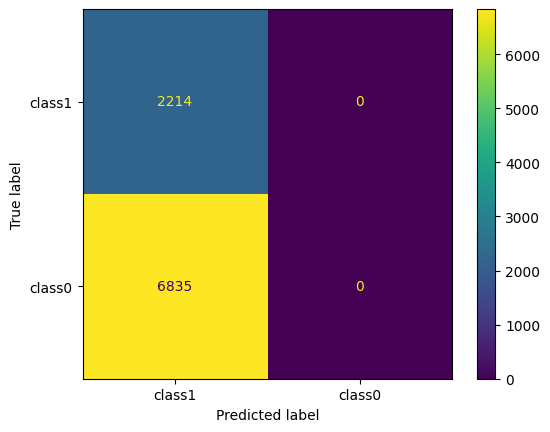

In [43]:
cm = confusion_matrix(model.y_test,fl, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()


In [44]:
@dataclass
class svm:
    lambda_param: float
    lr: float
    max_iteration: int

    def accuracy_test(self,y_preds):
        count0 = 0
        count1 = 0
        total_correct = 0
        for i in range(len(self.y)):
                if int(self.y[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if self.y[i] ==0:
                        count0+=1
                    elif self.y[i] ==1:
                        count1+=1

        total_wrong = count0+count1
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print('testing error', (rate)*100)
        print(classification_report(self.y, y_preds))
    def fit(self, X, y):
        N, n_features = X.shape
        self.w = np.ones(n_features)
        self.b = 0
        self.y=y
        X = X.astype(np.float64)
        y = y.astype(np.float64)  # Convert y to float64
        y_ = np.where(y <= 0, -1, 1)

        def convert_to_numeric(column):
            try:
                return pd.to_numeric(column)
            except ValueError:
                return column

        X_numeric = np.apply_along_axis(convert_to_numeric, axis=0, arr=X)  # Convert each column to numeric values
        X_numeric = np.nan_to_num(X_numeric)  # Replace NaN values with 0

        for i in tqdm(range(self.max_iteration), colour='blue'):
            for idx, x_i in enumerate(X_numeric):
                condition = (y_[idx] * (np.dot(x_i, self.w) + self.b)) >= 1
                if condition:
                    self.w -= 2 * self.lr * self.lambda_param * self.w
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= -y_[idx]
        self.predict=[]
        for i,x_i in enumerate(X_numeric):
            if (np.dot(x_i, self.w) + self.b) >= 0:
                self.predict.append(1)
            else:
                self.predict.append(0)


In [45]:
SupportVectorMachine= svm(lr=0.0001, max_iteration = 500,lambda_param=0.001)

In [46]:
SupportVectorMachine.fit(X[12000:14000],y[12000:14000])


100%|██████████| 500/500 [00:09<00:00, 50.56it/s]


In [47]:
SupportVectorMachine.w

array([-1.2005795 , -0.87652554,  0.01670128,  0.05212192, -0.19284521,
        0.46074835, -0.14913746,  0.39549182, -0.10696105,  0.49865845,
       -0.04183095,  0.20982505,  0.1783669 ,  0.14761021,  0.76101376,
       -0.07579888,  0.11281803, -0.27927383, -0.86633066,  0.2675933 ,
       -0.44965911,  0.16958925, -0.03277168,  0.483229  ,  0.14142384,
        0.11151015,  0.44463099,  0.9642796 ,  0.40124302, -0.30062491,
       -0.39311763, -0.22553077,  0.09572405,  0.22931852, -0.13232899,
        0.29001831, -0.79766122,  0.59127042,  0.64369922,  0.0084357 ,
        0.85947627,  0.55360275,  0.99430736,  0.40200465, -0.03315958,
        0.38279057,  0.18486446, -0.00908616, -0.44830786,  0.41928444,
       -0.24722132,  0.72408919,  0.17307394,  0.75332083,  0.3505812 ,
        0.11467861,  0.34862402, -0.1487561 ,  0.01983684,  0.52471297,
        0.57931672,  0.47249095,  0.01159615,  0.79173238,  0.70978714,
       -0.13808413,  0.22064664,  0.13093994,  0.62201226,  0.37

In [48]:
SupportVectorMachine.b

-3

In [49]:
SupportVectorMachine.predict

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


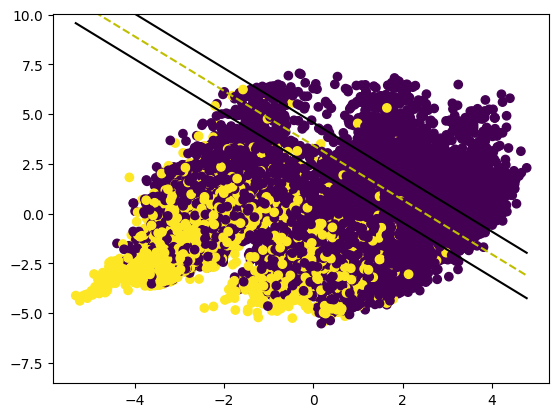

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors


def visualize_svm(X, y, clf):
    def get_hyperplane_value(x, w, b, offset):
        # Function to get the y-value of the hyperplane given x, weights, bias, and offset
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], marker='o',c=y)
# Define the x-range for plotting the hyperplane
    x0_1 = np.amin(X.iloc[:,0])
    x0_2 = np.amax(X.iloc[:,0])
# Calculate y-values for the hyperplane and its margins
    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')
# Set the y-axis limits
    x1_min = np.amin(X.iloc[:,1])
    x1_max = np.amax(X.iloc[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()




colors = ['blue','red']
cmap = pltcolors.ListedColormap(colors)


def generateBatchBipolar(n, mu=0.5, sigma=0.2):
    """ Two gaussian clouds on each side of the origin """
    X = np.random.normal(mu, sigma, (n, 2))
    yB = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y = 2. * yB - 1
    X *= y[:, np.newaxis]
    X -= X.mean(axis=0)
    return X, y

def plotLine(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)


def plotSvm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator',
            ax=None, bound=[[-1., 1.], [-1., 1.]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)

    im = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=cmap, alpha=0.5, label=label)
    if support is not None:
        ax.scatter(support[:,0], support[:,1], label='Support', s=80, facecolors='none',
                   edgecolors='y', color='y')
        print("Number of support vectors = %d" % (len(support)))
    if w is not None:
        xx = np.array(bound[0])
        plotLine(ax, xx, w, intercept, separatorLabel)
        # Plot margin
        if support is not None:
            signedDist = np.matmul(support, w)
            margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
            supportMaxNeg = support[np.argmin(signedDist)]
            plotLine(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
            supportMaxPos = support[np.argmax(signedDist)]
            plotLine(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
            ax.set_title('Margin = %.3f' % (margin))
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    cb = plt.colorbar(im, ax=ax)
    loc = np.arange(-1,1,1)
    cb.set_ticks(loc)
    cb.set_ticklabels(['-1','1'])

# Assuming SupportVectorMachine is your trained SVM model and X, y are your data
visualize_svm( X.iloc[:,:2],y,SupportVectorMachine)


In [51]:
SupportVectorMachine.accuracy_test(SupportVectorMachine.predict)

misclassification rate 0.145
testing error 14.499999999999998
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1510
           1       0.85      0.49      0.62       490

    accuracy                           0.85      2000
   macro avg       0.85      0.73      0.77      2000
weighted avg       0.85      0.85      0.84      2000



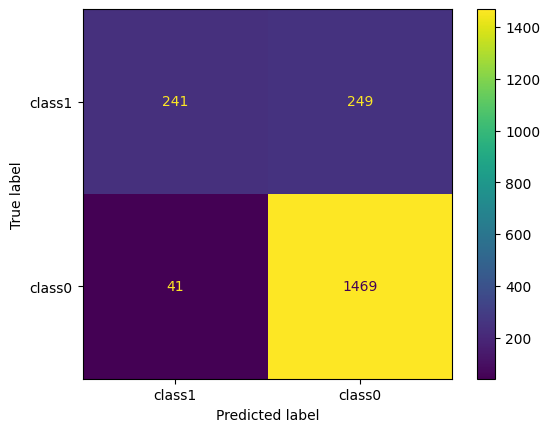

In [53]:
cm = confusion_matrix(SupportVectorMachine.y,SupportVectorMachine.predict, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()


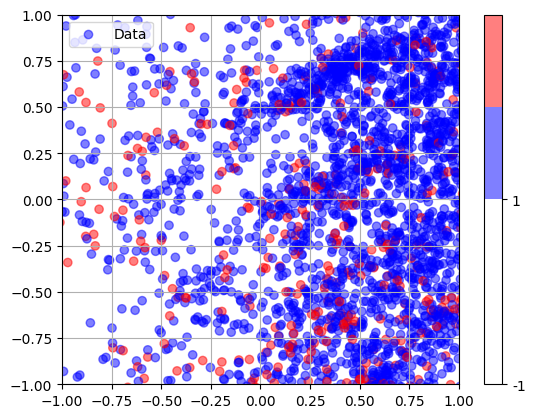

In [54]:
plotSvm(X.iloc[:,:2],y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator',
            ax=None, bound=[[-1., 1.], [-1., 1.]])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X[12000:14000], y[12000:14000], test_size=0.3,shuffle=True)

In [56]:
from sklearn.metrics import classification_report
from datetime import datetime
class KNearestNeighbor:

    def __init__(self,X_train,y_train,X_test,y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test


    def euclidean_dist(self,pointA, pointB):
        distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
        distance = np.sum(distance) # adds all values
        distance = np.sqrt(distance)
        return distance

    def distance_from_all_training(self,test_point):
        dist_array = np.array([])
        for train_point, row in self.X_train.iterrows():
            dist = self.euclidean_dist(test_point, train_point)
            dist_array = np.append(dist_array, dist)
        return dist_array


    def accuracy_test(self,y_preds):
        test_end_time = datetime.now()
        count0 = 0
        count1 = 0
        total_correct = 0
        for i in range(len(self.y_test)):
                if int(self.y_test[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if self.y_test[i] ==0:
                        count0+=1
                    elif self.y_test[i] ==1:
                        count1+=1
        test_time = test_end_time - self.test_start_time
        print('Test Time: ', test_time)
        total_wrong = count0+count1
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print('testing error', (rate)*100)
        print(classification_report(self.y_test, y_preds))


    def KNNClassifier_test(self,k=19):
        self.test_start_time = datetime.now()
        predictions = np.array([])
        train_target = self.y_train
        train_target = train_target.reshape(-1,1)
        for test_point, row in self.X_test.iterrows():
            dist_array = self.distance_from_all_training(test_point).reshape(-1,1)
            neighbors = np.concatenate((dist_array, train_target),axis = 1,)
            neighbors_sorted = neighbors[neighbors[:, 0].argsort()]  # sorts training points on the basis of distance
            k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
            frequency = np.unique(k_neighbors[:, 1], return_counts=True)
            target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency
            predictions = np.append(predictions, target_class)
        return predictions

In [57]:
knn = KNearestNeighbor(X_train,y_train,X_test,y_test)

In [58]:
training_predicted = knn.KNNClassifier_test()

In [59]:
training_predicted

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [60]:
knn.accuracy_test(y_preds = training_predicted)

Test Time:  0:01:20.459025
misclassification rate 0.24666666666666667
testing error 24.666666666666668
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       459
           1       0.27      0.03      0.05       141

    accuracy                           0.75       600
   macro avg       0.52      0.50      0.45       600
weighted avg       0.65      0.75      0.67       600



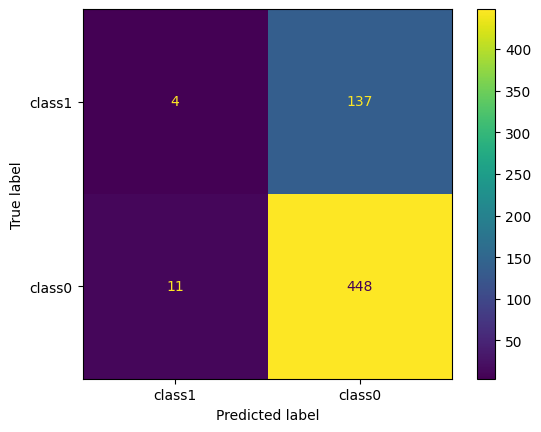

In [61]:
cm = confusion_matrix(knn.y_test,training_predicted, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()


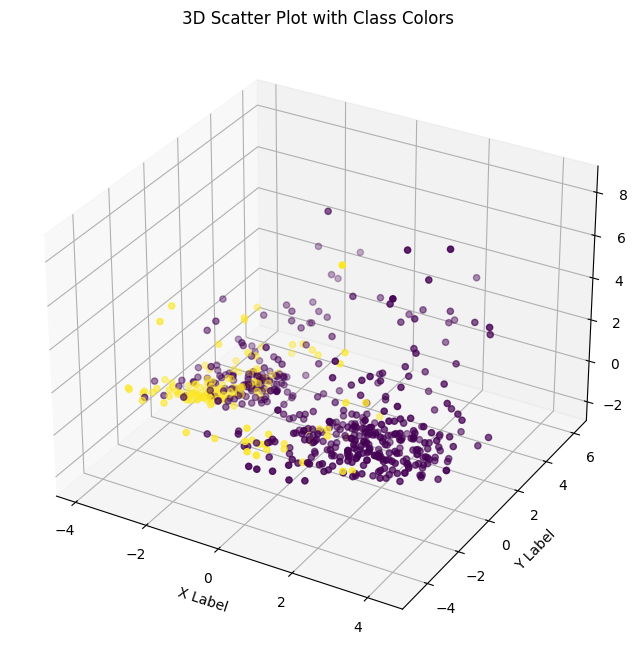

In [62]:
  # fig, ax = plt.subplots()
  # plt.scatter(knn.X_test.iloc[:,0], knn.X_test.iloc[:,1], marker="o", c=training_predicted)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming you've instantiated the KNearestNeighbor class and have your predictions
knn = KNearestNeighbor(X_train, y_train, X_test, y_test)
training_predicted = knn.KNNClassifier_test()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points with different colors for different classes
ax.scatter(knn.X_test.iloc[:, 0], knn.X_test.iloc[:, 1], knn.X_test.iloc[:, 2], c=knn.y_test, cmap='viridis')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot with Class Colors')

plt.show()

